# ***Capstone Project: Providing Data-Driven Suggestions for HR***

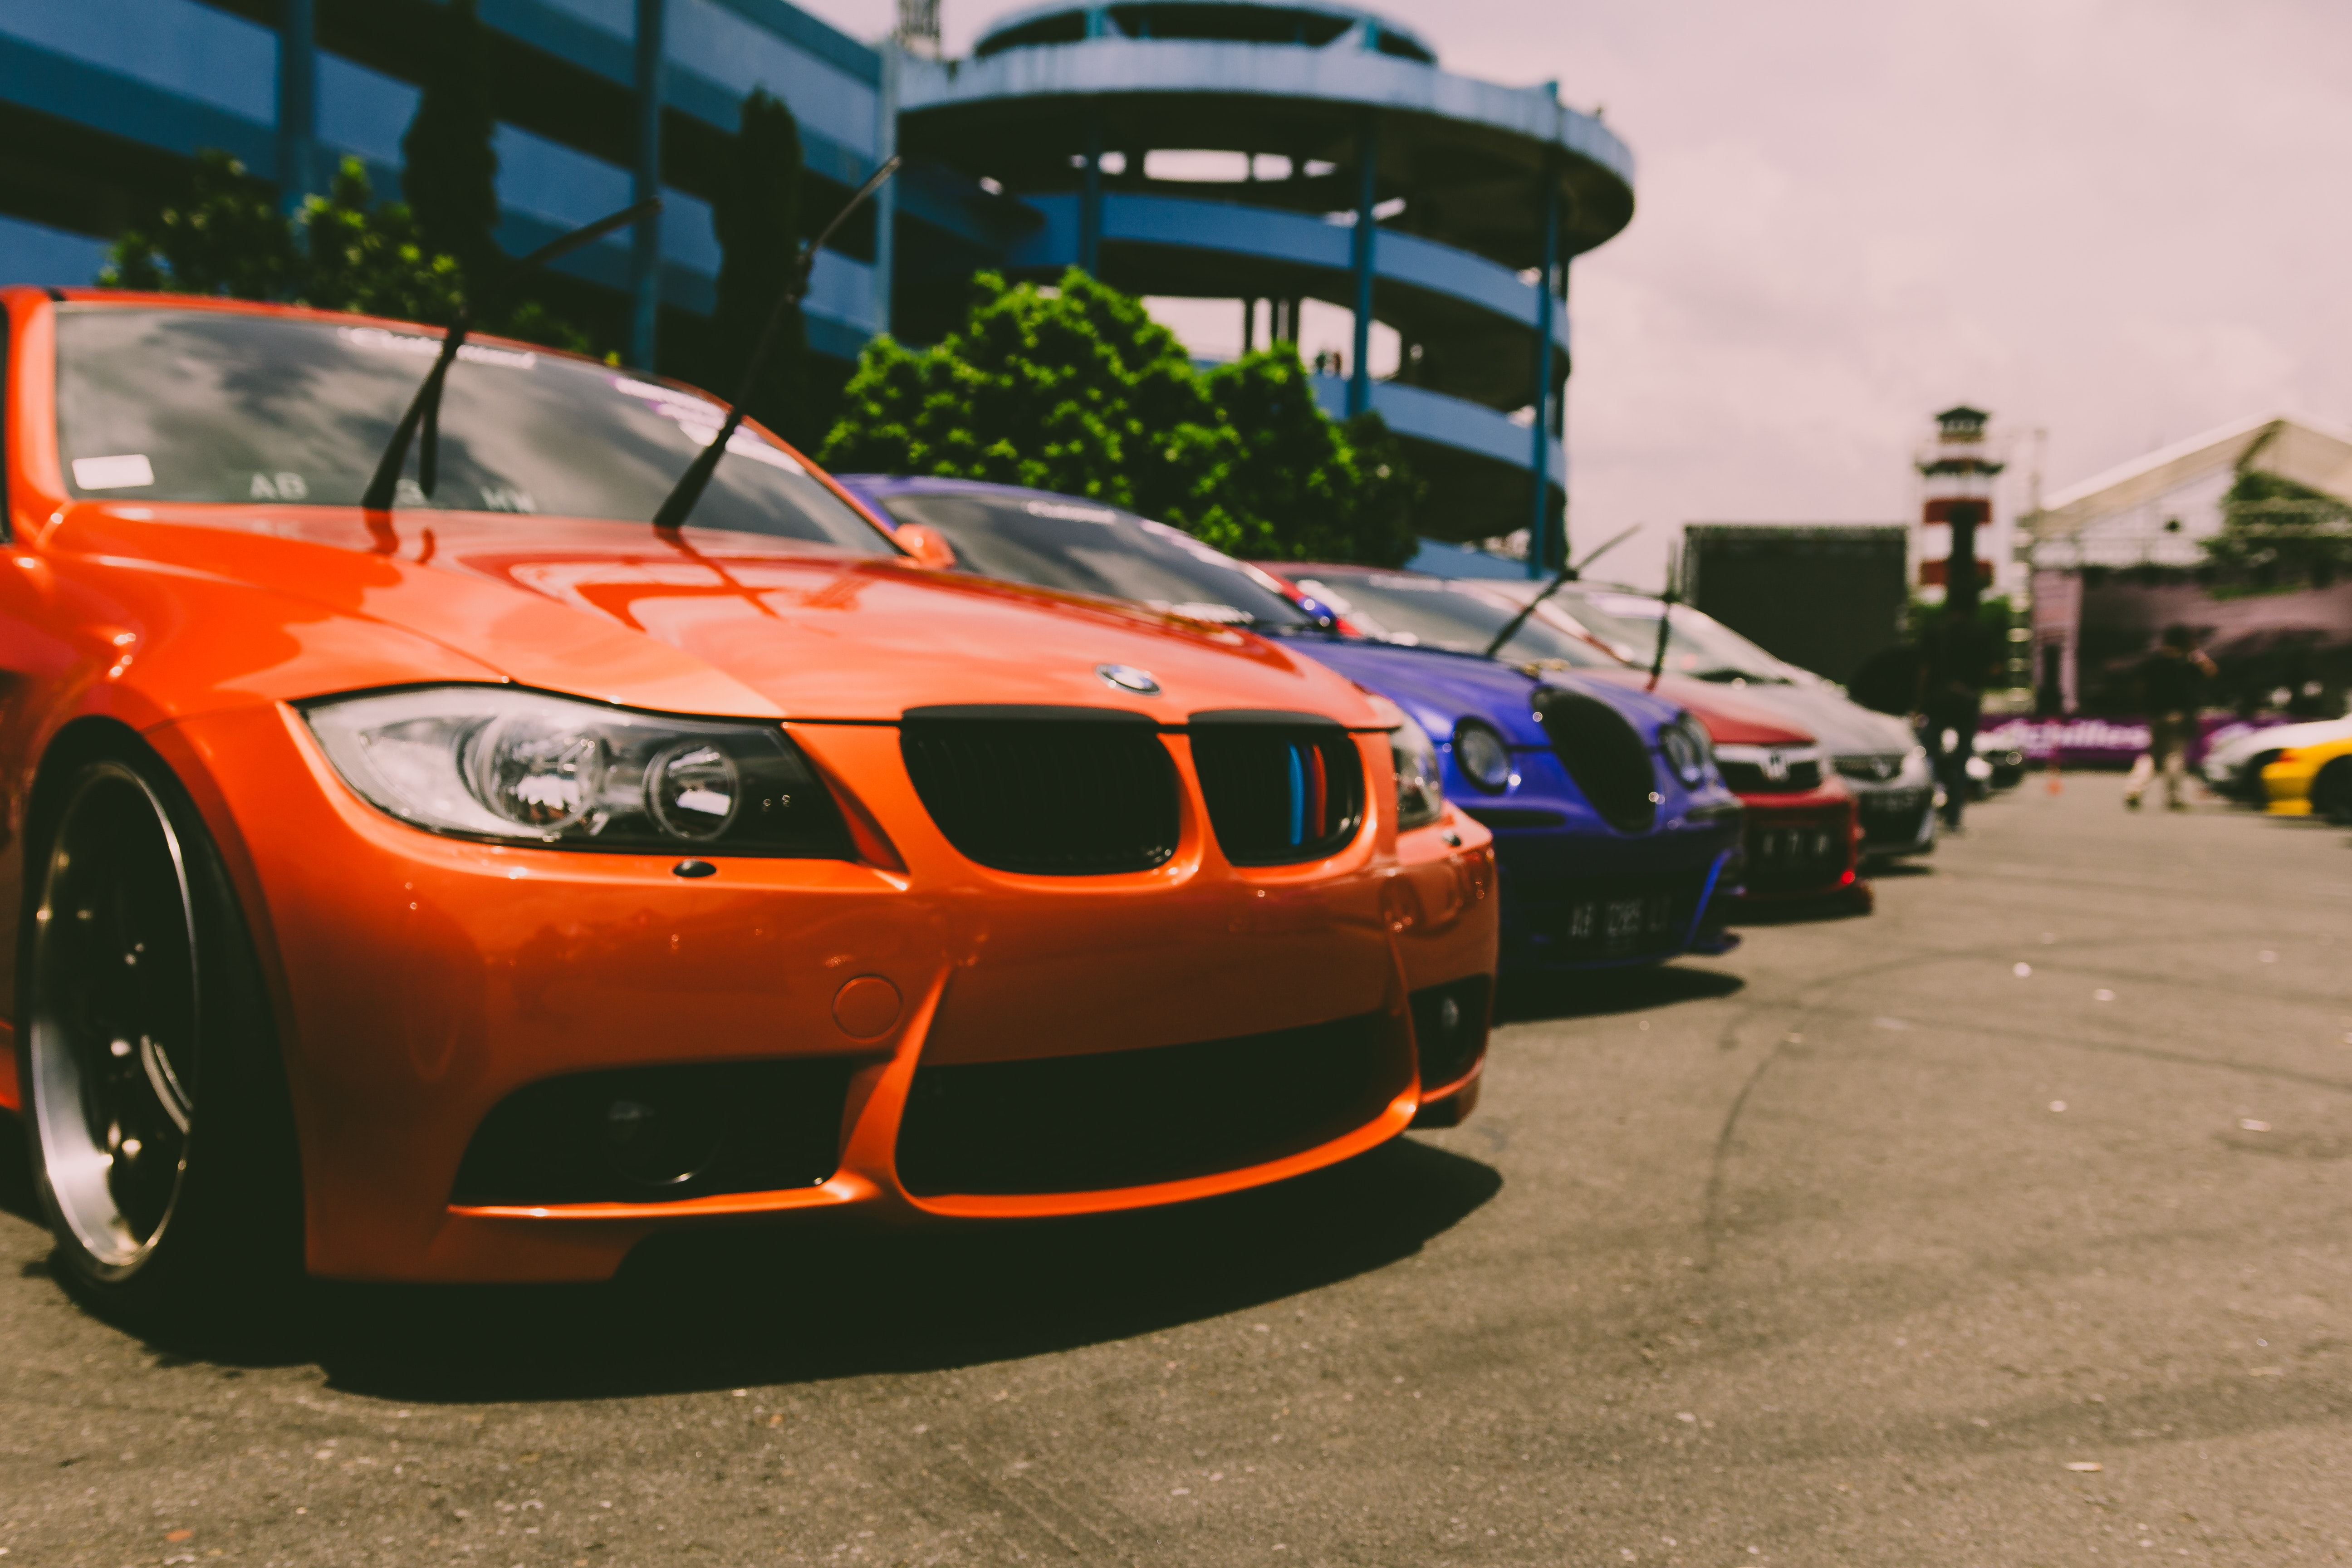

## Scenario Overview: Working for Salifort Motors

<b>About the company<b>     

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.   
    
    
<b>My business case<b>

As a data specialist employed at Salifort Motors, I have been presented with the outcomes of a recent employee survey. The senior leadership team has assigned me the responsibility of analyzing the data in order to generate suggestions for enhancing employee retention. To assist in this endeavor, they have requested that I develop a model capable of predicting whether an employee will leave the company, utilizing variables such as department, number of projects, average monthly hours, and any additional relevant data points. 
    
    
<b>The value of my deliverable<b>

For this deliverable, I am asked to choose a method to approach this data challenge based on my prior course work and to select either a regression model or a machine learning model to predict whether an employee will leave the company. 

### Problem Statement
Salifort Motors seeks to improve employee retention and answer the following question:

<b>*What’s likely to make the employee leave the company?*<b>

Since the variable we are seeking to predict is categorical, I could build either a logistic regression or a tree-based machine learning model.

This model would help predict whether an employee will leave and identify which factors are most influential. These insights can help HR make decisions to improve employee retention.


# 1) Planning Stage
## HR dataset familiarization

The dataset of the survey contains 15,000 rows and 10 columns for the variables listed below: 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import Packages and Load Dataset

In [67]:
# Data Modeling
!pip install xgboost
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Metrics and Helpful Functions
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.tree import plot_tree

# Saving Models
import pickle

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Functions
from scipy import stats

# Data Preprocessing and Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics

# Linear Regression and Logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression Object
lr = LinearRegression()


In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Rename columns

In [6]:
# Display all column names
column_names = df0.columns.tolist()
print('\n'.join(column_names))

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [7]:
# Rename columns
df0 = df0.rename(columns={    
    'number_project': 'number_of_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'time_spent_company',
    'Work_accident': 'work_accident',    
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department',
})

# Print the updated column names
column_names = df0.columns.tolist()
print('\n'.join(column_names))


satisfaction_level
last_evaluation
number_of_projects
average_monthly_hours
time_spent_company
work_accident
left
promotion_last_5_years
department
salary


### Check missing values

In [8]:
missing_values = df0.isnull().sum()
print(missing_values)

satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64


### Check duplicates

In [9]:
duplicates = df0.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


In [10]:
# Inspect some rows containing duplicates
duplicate_rows = df0[duplicates]
print(duplicate_rows)

       satisfaction_level  last_evaluation  number_of_projects  \
396                  0.46             0.57                   2   
866                  0.41             0.46                   2   
1317                 0.37             0.51                   2   
1368                 0.41             0.52                   2   
1461                 0.42             0.53                   2   
...                   ...              ...                 ...   
14994                0.40             0.57                   2   
14995                0.37             0.48                   2   
14996                0.37             0.53                   2   
14997                0.11             0.96                   6   
14998                0.37             0.52                   2   

       average_monthly_hours  time_spent_company  work_accident  left  \
396                      139                   3              0     1   
866                      128                   3             

The provided output displays the initial five instances of duplicated rows that are repeated later in the dataframe. Considering the characteristics of the variables, it is logical to conclude that it is implausible for entries to have been legitimately entered as exact duplicates across all column fields. In simpler terms, it is not feasible for two entries from different individuals to be exactly the same. This holds particularly true for continuous variables, as their repetition from separate individuals would not occur by chance. Consequently, it is necessary to eliminate all duplicate entries.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable
df = df0.drop_duplicates()

# Re-check for duplicates
duplicates = df.duplicated()
print(duplicates)

# Display first few rows of new dataframe
df.head(10)

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Length: 11991, dtype: bool


satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   
5                0.41             0.50                   2   
6                0.10             0.77                   6   
7                0.92             0.85                   5   
8                0.89             1.00                   5   
9                0.42             0.53                   2   

   average_monthly_hours  time_spent_company  work_accident  left  \
0                    157                   3              0     1   
1                    262                   6              0     1   
2                    272                   4              0     1   
3                    223                   5              0     1   
4                    159                   3              0     1   
5                    153                   3              0     1   
6                    247                   4              0     1   
7                    259                   5              0     1   
8                    224                   5              0     1   
9                    142                   3              0     1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  
3                       0      sales     low  
4                       0      sales     low  
5                       0      sales     low  
6                       0      sales     low  
7                       0      sales     low  
8                       0      sales     low  
9                       0      sales     low

### Check outliers
Observing the data, there are only 3 variables that might possibly have outliers. The other variables are either boolean values, or continuous with a set range of 0-1, or categorical with 3 classes (i.e. "salary"): 
- number_of_projects 
- average_monthly_hours 
- time_spent_company 

By standardizing all 3, they can be plotted on a single boxplot to check for outliers. 

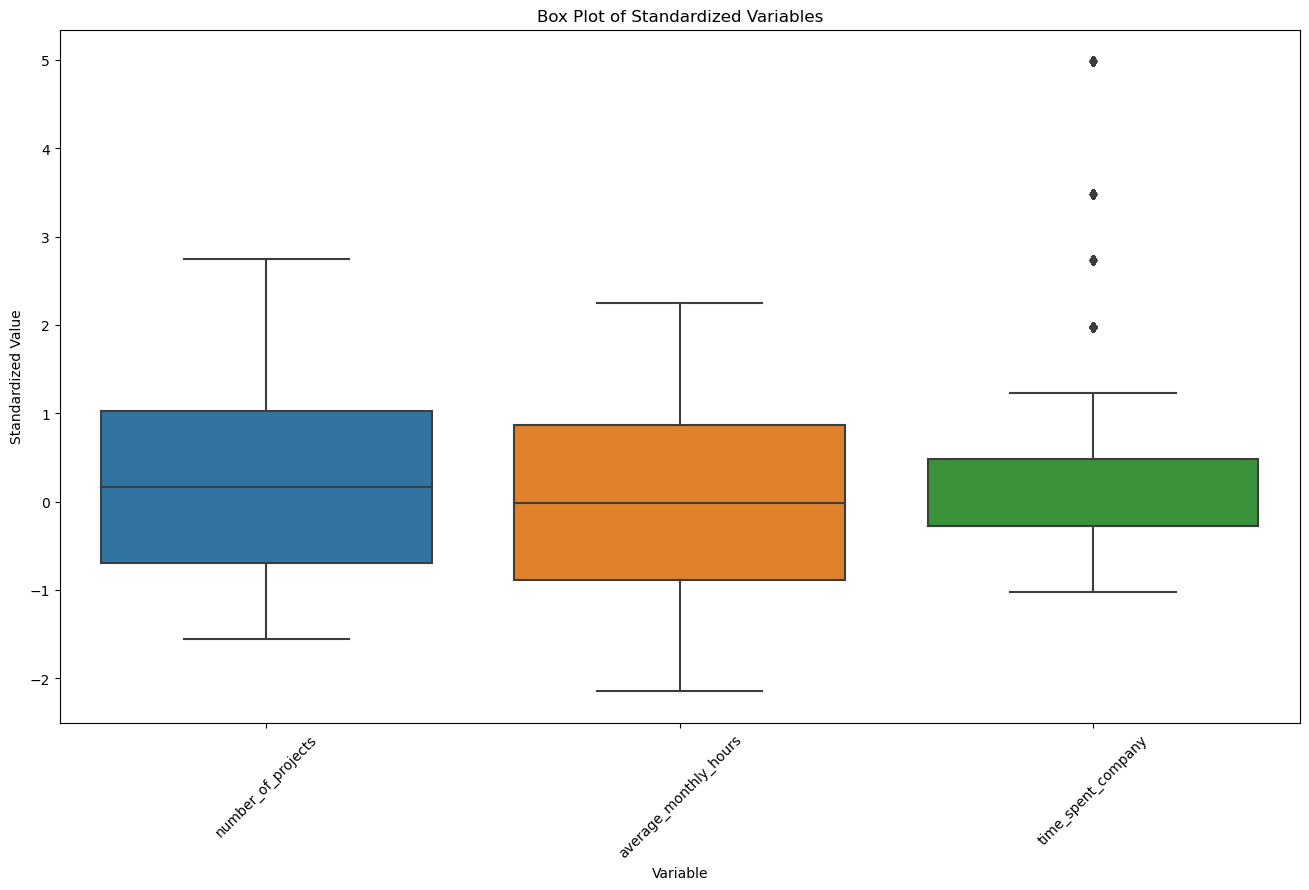

In [68]:
# Select the variables of interest
variables = ['number_of_projects', 'average_monthly_hours', 'time_spent_company']

# Standardize the variables
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df[variables]), columns=variables)

# Combine the standardized variables into a single DataFrame
df_combined = pd.melt(df_standardized, value_vars=variables, var_name='Variable', value_name='Standardized Value')

# Create a boxplot of the standardized variables
plt.figure(figsize=(16, 9))
sns.boxplot(data=df_combined, x='Variable', y='Standardized Value')
plt.title('Box Plot of Standardized Variables')
plt.xlabel('Variable')
plt.ylabel('Standardized Value')
plt.xticks(rotation=45)
plt.show()

The variable "time_spent_company" is the only one that contains outliers. To assess the impact of these outliers, I will utilize the interquartile range (IQR) method to determine the total number of outliers and calculate the percentage of outliers for this column. These statistics will be crucial in informing decisions during the construct phase, specifically regarding the handling of outliers and whether they should be removed from the dataset.

In [13]:
time_spent_company = df['time_spent_company']

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(time_spent_company, 25)
Q3 = np.percentile(time_spent_company, 75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Count the number of outliers
outliers = time_spent_company[(time_spent_company < lower_bound) | (time_spent_company > upper_bound)]
num_outliers = len(outliers)

# Calculate percentage of outliers
percentage_outliers = (num_outliers / len(df['time_spent_company'])) * 100

print("Number of outliers in time_spent_company:", num_outliers)
print(f"Percentage of outliers in 'time_spent_company': {percentage_outliers:.2f}%")

Lower bound: 1.5
Upper bound: 5.5
Number of outliers in time_spent_company: 824
Percentage of outliers in 'time_spent_company': 6.87%


Based on the provided results, there are 824 outliers in the "time_spent_company" variable, which accounts for approximately 6.87% of the total observations. Although this indicates the presence of outliers, it does not exceed a threshold of 10% and is fairly close to another standard threshold of 5%.

Since it is below the chosen threshold of 10%, it can be considered a relatively small amount within the dataset. The majority of the data points in the "time_spent_company" variable fall within the expected range.

While the number of outliers is not substantial, it is still important to analyze their impact on the resulting models. By examining the data both with and without outliers, I can assess if their presence significantly influences the outcomes. It is unlikely that they will heavily affect the overall analysis. 

# 2) Analysis Stage

## Data Exploration (Continue EDA)
The purpose of EDA before constructing a predictive model is to gain insights into the data, understand its characteristics, identify relationships between variables, detect patterns, and uncover any potential challenges or issues. EDA helps in making informed decisions about data preprocessing, feature selection, and model selection.

### Data visualizations
First I would like to establish whether at all this is a departmental problem. 

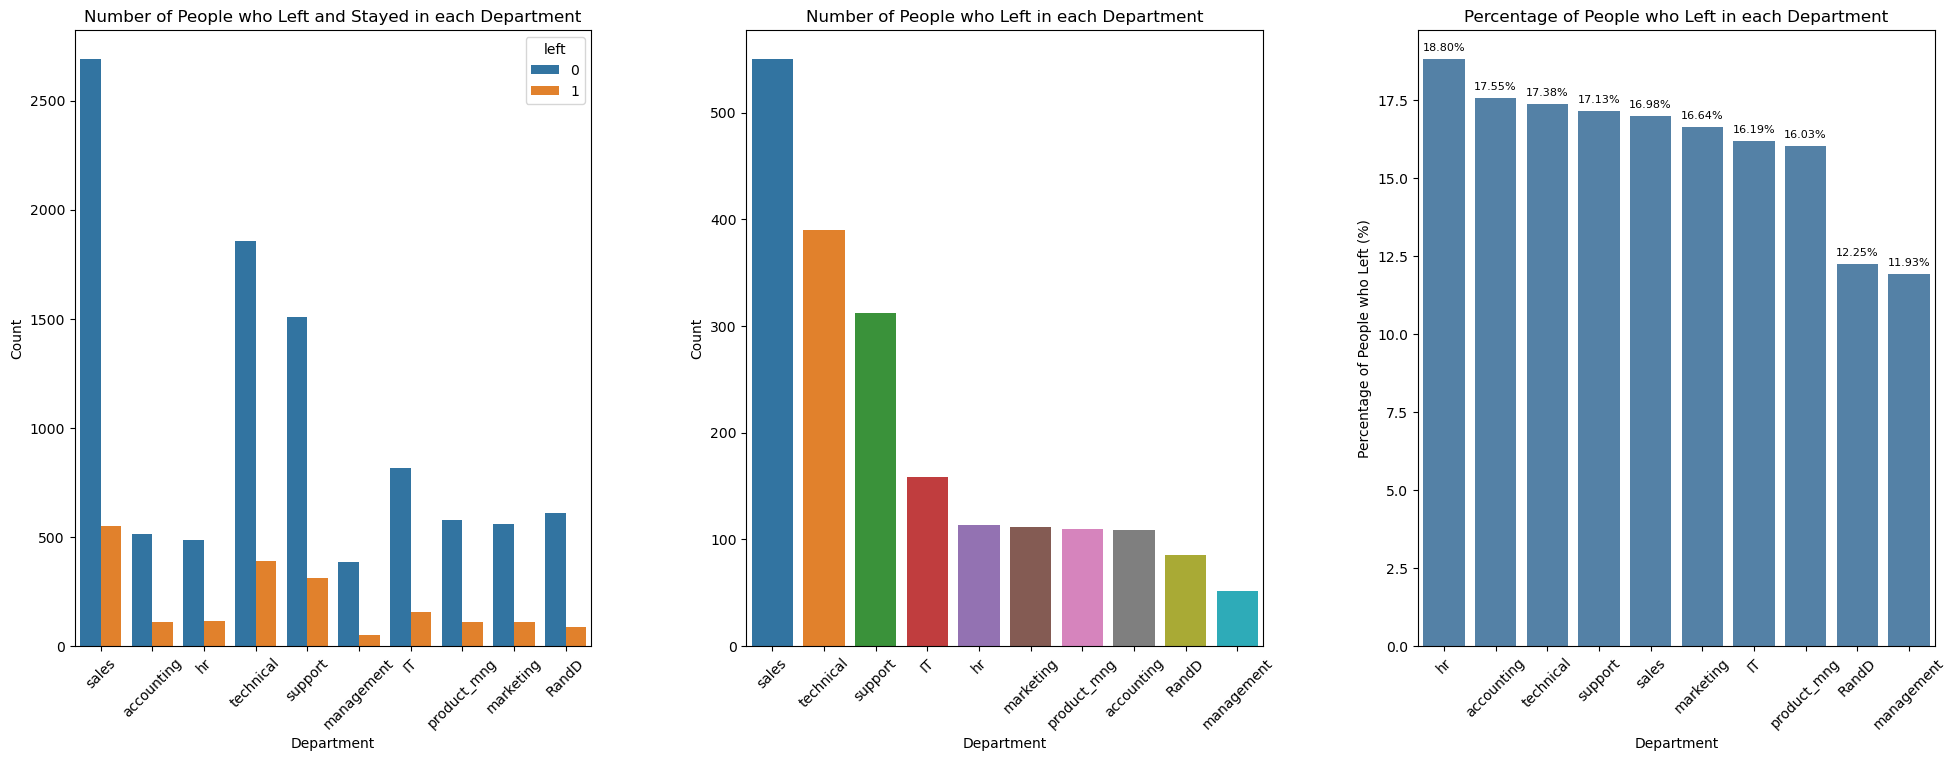

In [69]:
# Select the variables of interest
department = 'department'
left = 'left'

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

# Filter the dataframe to include only the people who left
left_df = df[df[left] == 1]

# Calculate the number of people who left in each department
left_count = left_df[department].value_counts().sort_values(ascending=False)

# Create a countplot with descending order
sns.countplot(data=left_df, x=department, order=left_count.index, ax=ax[1])
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Count')
ax[1].set_title('Number of People who Left in each Department')
ax[1].tick_params(axis='x', rotation=45)

# Calculate the percentage of people who left in each department and sort in descending order
left_ratio = df.groupby(department)[left].mean() * 100
left_ratio = left_ratio.sort_values(ascending=False)

# Create a bar plot
sns.barplot(x=left_ratio.index, y=left_ratio.values, color='steelblue', ax=ax[2])
ax[2].set_xlabel('Department')
ax[2].set_ylabel('Percentage of People who Left (%)')
ax[2].set_title('Percentage of People who Left in each Department')
ax[2].tick_params(axis='x', rotation=45)

# Add percentage labels on top of the bars
for i, v in enumerate(left_ratio.values):
    ax[2].text(i, v + 0.2, f'{v:.2f}%', ha='center', va='bottom', fontsize=8)

# Create a countplot
sns.countplot(data=df, x=department, hue=left, orient="h", ax=ax[0])
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of People who Left and Stayed in each Department')
ax[0].tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots

plt.show()

While there is a higher number of individuals who have left in the Sales, Technical, and Support departments, the proportion or percentage of employees who left remains relatively consistent across all departments, as depicted in the right-most plot. This suggests that the issue of employees leaving is not specific to particular departments.

To delve deeper into this matter, the next step would be to explore whether the departure of employees is influenced by heavier workloads between departments. This investigation would involve analyzing the monthly hours worked and the number of projects assigned per department.

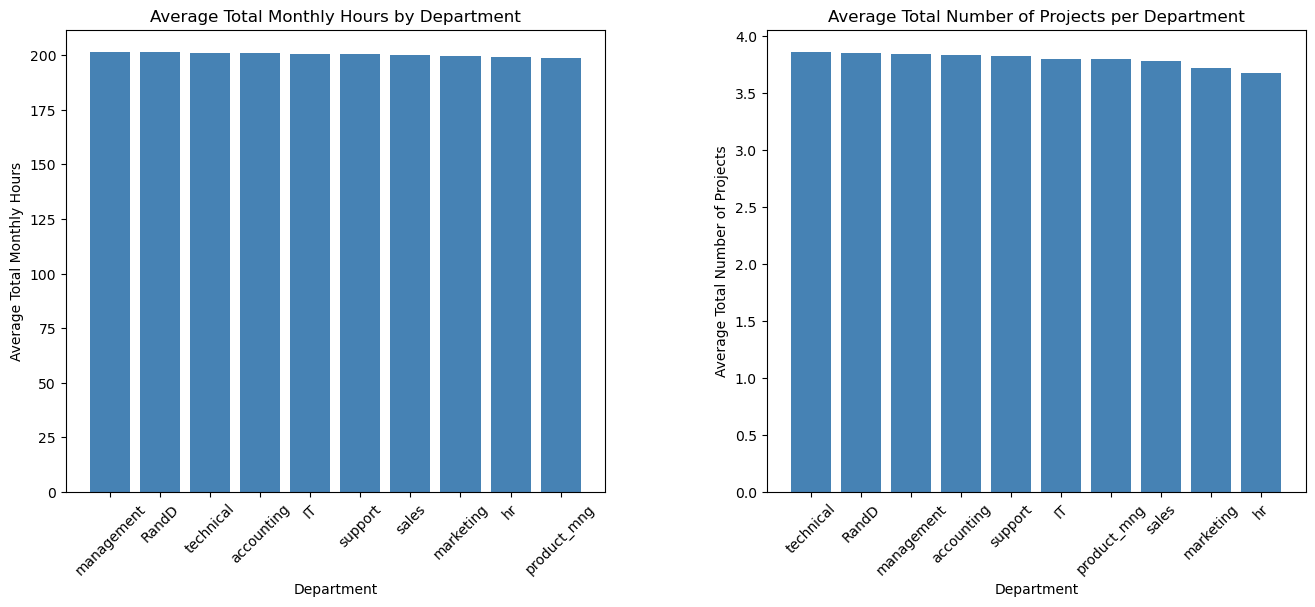

In [70]:
# Select the variables of interest
department = 'department'
monthly_hours = 'average_monthly_hours'
num_projects = 'number_of_projects'

# Calculate the average total monthly hours by department
avg_monthly_hours = df.groupby(department)[monthly_hours].mean().sort_values(ascending=False)

# Calculate the average total number of projects per department
avg_num_projects = df.groupby(department)[num_projects].mean().sort_values(ascending=False)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average Total Monthly Hours by Department (Descending Order)
axes[0].bar(avg_monthly_hours.index, avg_monthly_hours.values, color='steelblue')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Average Total Monthly Hours')
axes[0].set_title('Average Total Monthly Hours by Department')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Total Number of Projects per Department (Descending Order)
axes[1].bar(avg_num_projects.index, avg_num_projects.values, color='steelblue')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Average Total Number of Projects')
axes[1].set_title('Average Total Number of Projects per Department')
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()

Based on the two plots shown above, it can be observed that the workload remains relatively consistent across all departments. This provides further confirmation that the underlying reason for employees leaving the company is likely a widespread issue affecting all departments.

Moving forward, the focus will be on identifying the variables that exhibit the strongest inter-correlations and are most likely to impact the likelihood of employees leaving the company or being terminated. A pairplot will be used for this analysis, excluding the variable "department". In order to include the variable "salary" in the analysis, it needs to be converted into a numerical datatype by assigning a numeric value to each category of the string variable.

In [16]:
# Define the mapping of categorical values to numerical values
salary_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

# Create a new column with the assigned numerical values using .map and .loc
df.loc[:, 'salary_numeric'] = df['salary'].map(salary_mapping)

# Display the updated DataFrame
df.head(10)


C:\Users\ruipa\AppData\Local\Temp\ipykernel_10216\1916999967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'salary_numeric'] = df['salary'].map(salary_mapping)


satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   
5                0.41             0.50                   2   
6                0.10             0.77                   6   
7                0.92             0.85                   5   
8                0.89             1.00                   5   
9                0.42             0.53                   2   

   average_monthly_hours  time_spent_company  work_accident  left  \
0                    157                   3              0     1   
1                    262                   6              0     1   
2                    272                   4              0     1   
3                    223                   5              0     1   
4                    159                   3              0     1   
5                    153                   3              0     1   
6                    247                   4              0     1   
7                    259                   5              0     1   
8                    224                   5              0     1   
9                    142                   3              0     1   

   promotion_last_5_years department  salary  salary_numeric  
0                       0      sales     low               1  
1                       0      sales  medium               2  
2                       0      sales  medium               2  
3                       0      sales     low               1  
4                       0      sales     low               1  
5                       0      sales     low               1  
6                       0      sales     low               1  
7                       0      sales     low               1  
8                       0      sales     low               1  
9                       0      sales     low               1

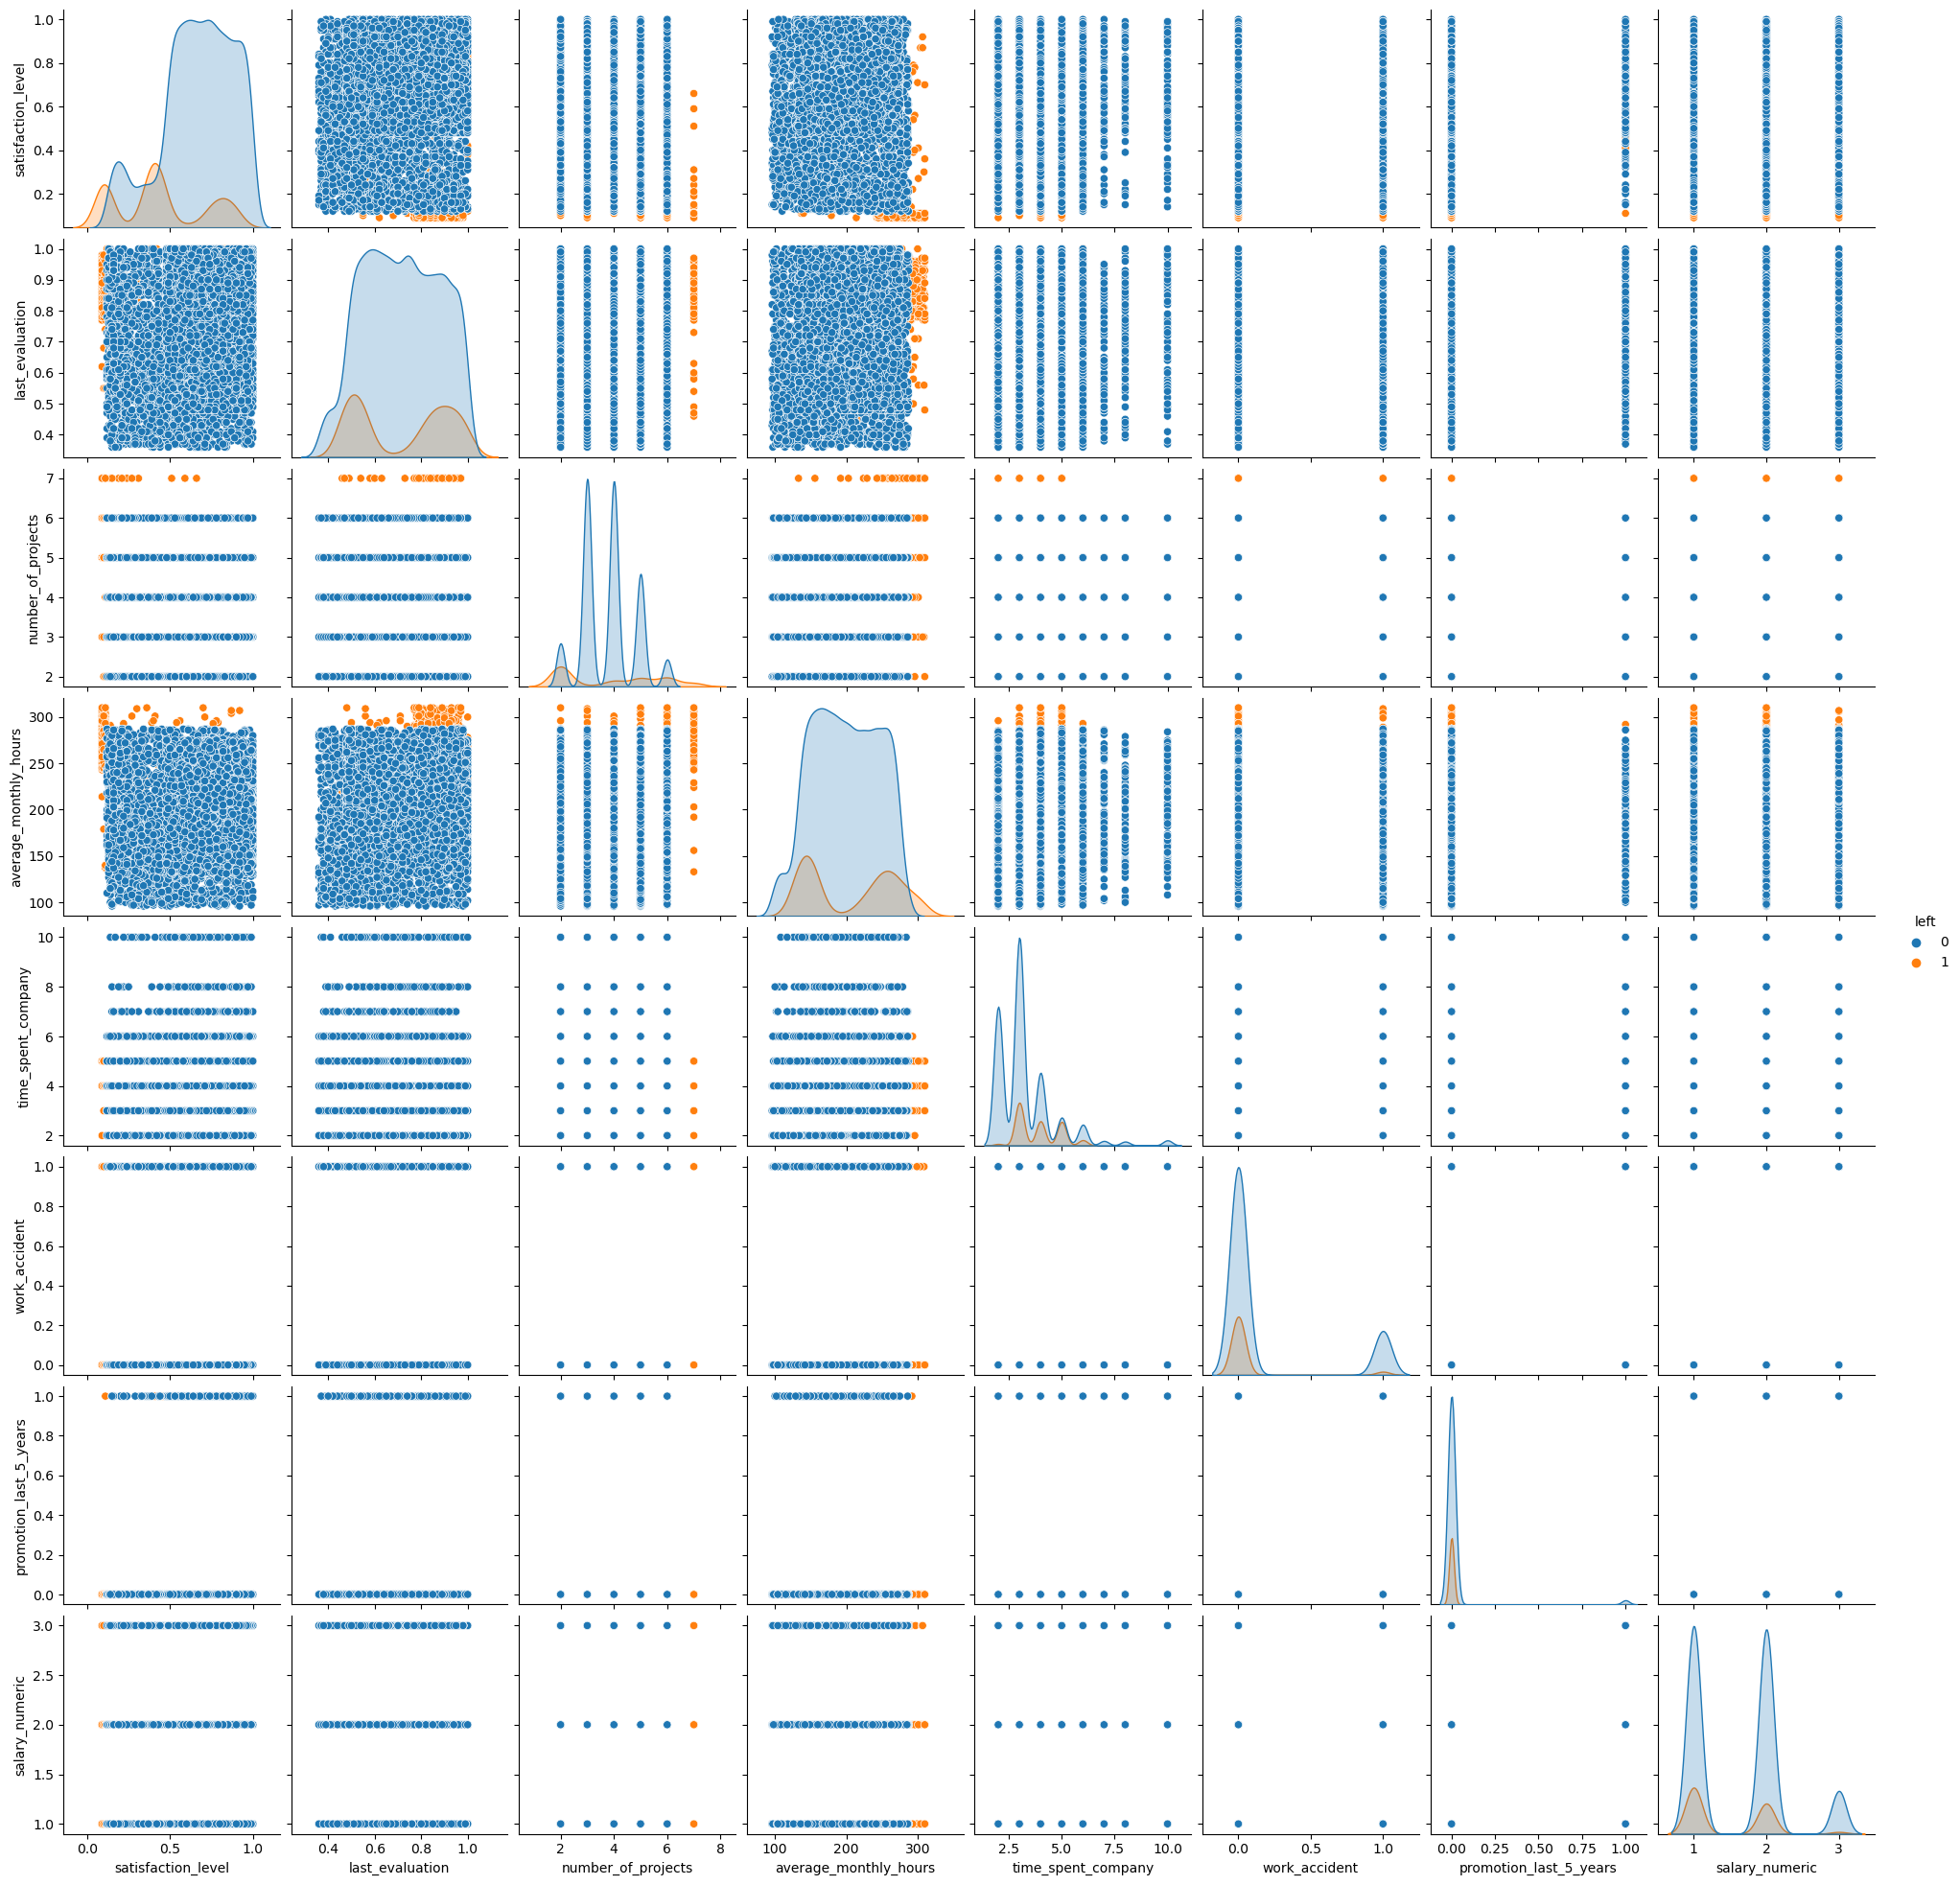

In [16]:
# Select the variables of interest
variables = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours',
             'time_spent_company', 'work_accident', 'left', 'promotion_last_5_years', 'salary_numeric']

# Create a pairplot with hue
sns.pairplot(df[variables], hue="left")
plt.show()

The pairplot analysis reveals significant influences of the number of projects and monthly hours on the likelihood of employees leaving the company. As these variables increase, the number of people leaving also tends to increase. Notably, all individuals assigned to 7 projects have left the company. This pattern is consistently observed throughout the rows and columns of these two variables, where the orange observations indicate instances of employees leaving. Additionally, a small portion of individuals with low satisfaction ratings also exhibit a tendency to leave. The relationship between other variables and employee attrition is less conclusive, as the orange observations may overlap with the blue observations and hidden as a result. 

Further observations that warrant closer examination are as follows:
1. Employees with high evaluation scores tend to leave when their monthly hours worked exceed a certain threshold (Monthly Hours vs Last Evaluation).
2. Longer tenured employees have a lower propensity to leave, even when their monthly hours worked are high (Monthly Hours vs Time Spent at Company).
3. Individuals who received a promotion in the last 5 years are less likely to leave, despite working long hours (Monthly Hours vs Promotion).

Based on these insights, it is crucial to focus on the variables of Monthly Hours, Number of Projects, Last Evaluation, and Time Spent at Company for further modeling. To gain further confirmation or investigation, a correlation heatmap can be plotted.

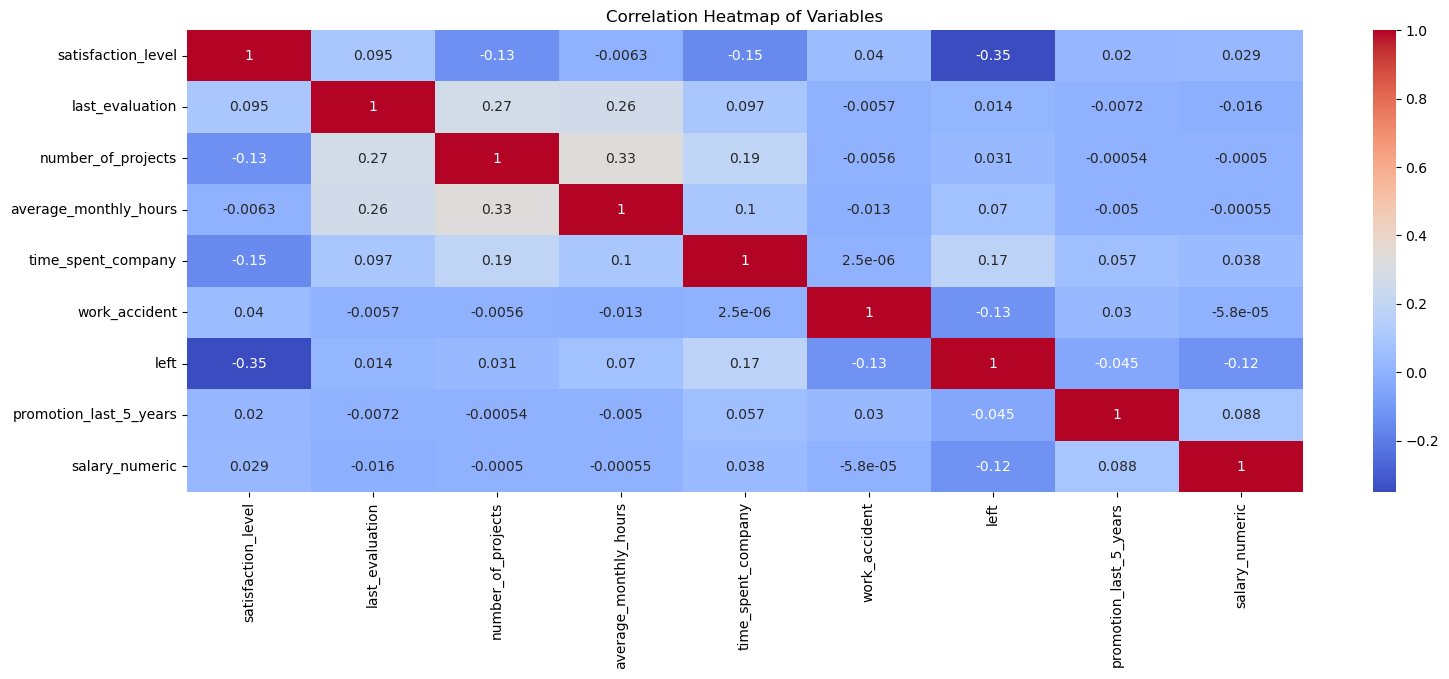

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=False)
plt.title('Correlation Heatmap of Variables')
plt.show()

The correlation heatmap presented above provides further confirmation of the strong correlations among Monthly Hours, Number of Projects, Last Evaluation, and Time Spent at Company. Additionally, it highlights the low correlations between Department, Salary, Work Accident, and employee attrition. Notably, there is a negative correlation between individuals leaving the company due to low satisfaction ratings and other variables such as Salary, Work Accidents, Promotions, and Department. This may still be considered inconclusive, however, and therefore the following relationships are more closely scrutinized.

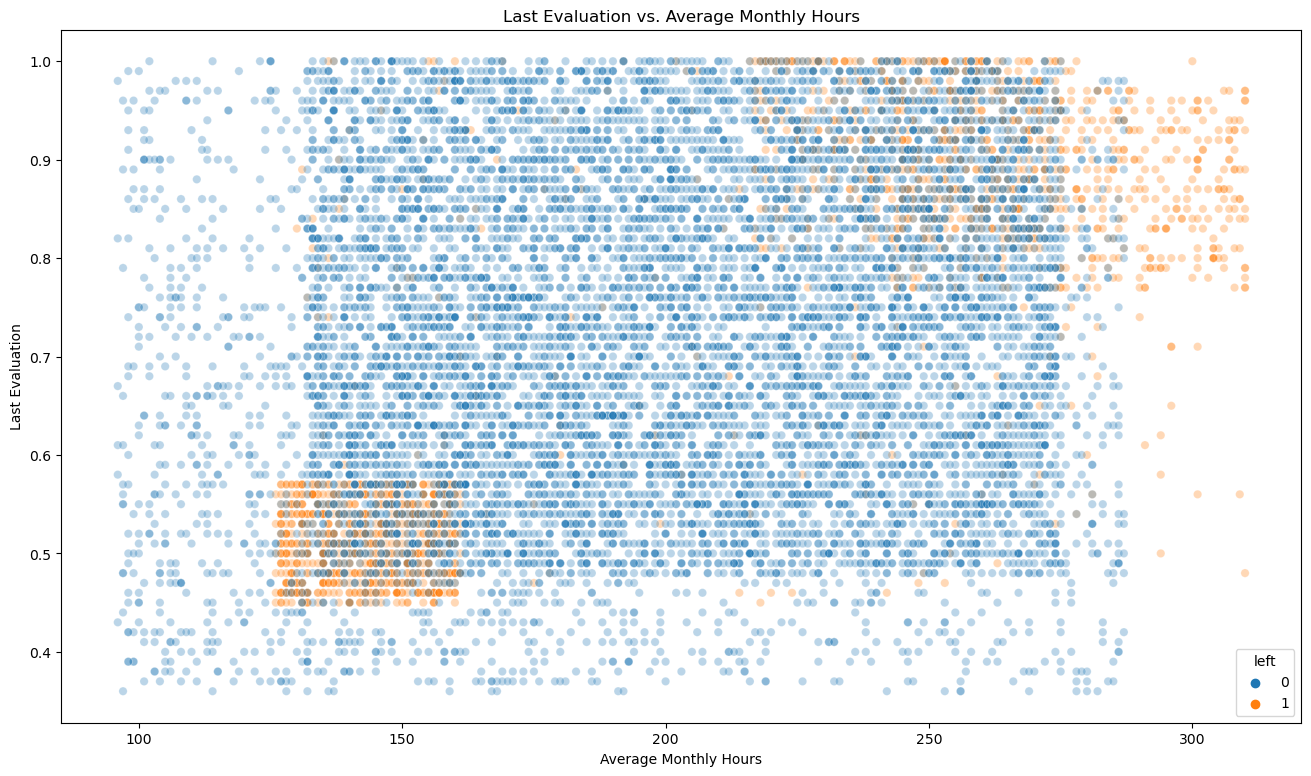

In [18]:
# Create scatterplot
plt.figure(figsize=(16, 9))
scatterplot = sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left')

# Set alpha value for "not left" observations
scatterplot.get_children()[0].set_alpha(0.3)

# Set plot labels and title
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.title('Last Evaluation vs. Average Monthly Hours')

# Show the plot
plt.show()

<Figure size 1600x900 with 0 Axes>

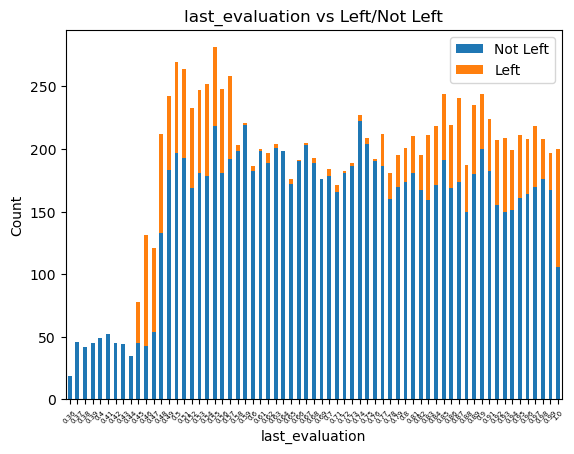

In [19]:
# Group the data by `last_evaluation` and calculate the count of left and not left employees
grouped_data = df.groupby(['last_evaluation', 'left']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(16, 9))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('last_evaluation')
plt.ylabel('Count')
plt.title('last_evaluation vs Left/Not Left')
plt.legend(['Not Left', 'Left'])
plt.xticks(rotation=45, size=5)
plt.show()

The 2 plot analyses for last_evaluation and average_monthly_hours above reveals the following insights:

- There is a clear trend indicating that a significant number of individuals who worked more than approximately 275 hours ended up leaving the company.
- Group 1: Among those who left, a notable cluster can be observed with average monthly hours ranging from approximately 215 to 310, and evaluation levels between 0.75 and 1.0. This group comprises highly evaluated individuals who are likely considered skilled workers. However, their departure might be attributed to the heavy workload imposed on them, leading to dissatisfaction and eventually leaving the company.
- Group 2: Falls within the range of 125 to 160 hours of average monthly hours and has evaluation levels ranging from 0.45 to 0.58. It appears that this group's departure may be influenced by low evaluation scores, potentially indicating that they were either fired or experienced a lack of motivation to work longer hours. As a result, their evaluation scores suffered, leading to their decision to leave or being let go.

The 2 groups are further indicated on the stacked barplot. These observations highlight the significance of average monthly hours and evaluation levels as potential contributing factors to employee attrition. Further investigation and analysis are recommended to gain a deeper understanding of the relationship between these variables and the reasons behind employee departures.

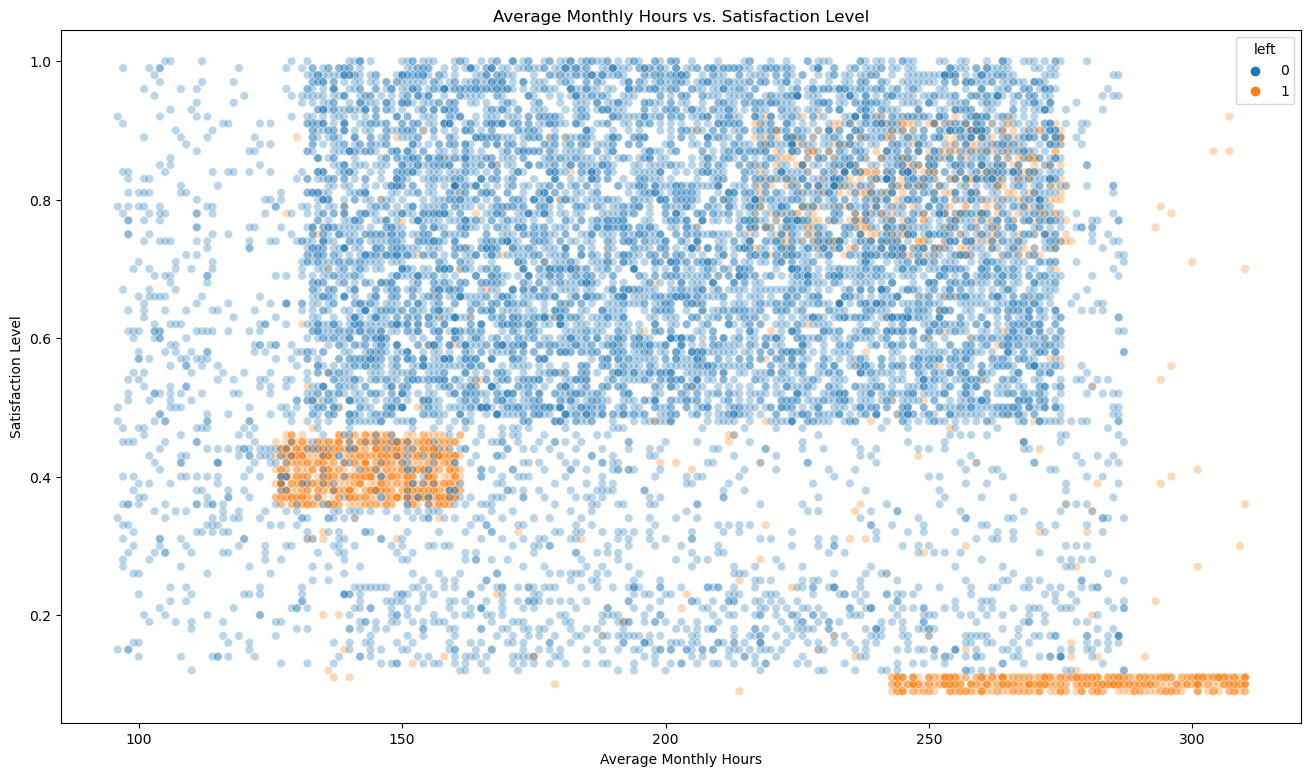

In [20]:
# Create scatterplot
plt.figure(figsize=(16, 9))
scatterplot = sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left')

# Set alpha value for "not left" observations
scatterplot.get_children()[0].set_alpha(0.3)

# Set plot labels and title
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.title('Average Monthly Hours vs. Satisfaction Level')

# Show the plot
plt.show()


The scatterplot analysis provides the following insights:

- A distinct pattern emerges, indicating that a significant number of individuals who worked over approximately 275 hours left the company.
- Group 1: Among those who left, there is a noticeable cluster with average monthly hours ranging from approximately 215 to 275, and evaluation levels between 0.7 and 0.9. This group consists of individuals who are highly satisfied. There appears to be a potential correlation between last_evaluation and satisfaction_level to some degree. Interestingly, this cluster exhibits similar ranges as the previous scatterplot's Group 1 cluster. This suggests that the previous assumption of dissatisfaction due to long hours may not be the sole reason for their departure. Other factors may have influenced their decision to leave.
- Group 2: This group is characterized by average monthly hours ranging from 125 to 160 and evaluation levels between 0.35 and 0.45. Once again, there is a correlation between this cluster and the evaluation scatterplot, with similar ranges observed. The positioning of these clusters on both scatterplots, with average_monthly_hours as the constant x-axis variable, suggests a consistent pattern. This cluster aligns with the notion that individuals with lower evaluation scores are less satisfied and more likely to be fired or choose to leave compared to Group 1 (high evaluation, highly satisfied individuals who still left or were fired).
- Group 3: There is an additional cluster consisting of individuals with extremely low satisfaction levels (ranging from 0.04 to 0.08) who left the company. This cluster is characterized by monthly hours worked between 240 and 310. The presence of this group indicates that extremely dissatisfied employees, despite their long hours, made the decision to leave the company.

<Figure size 1600x900 with 0 Axes>

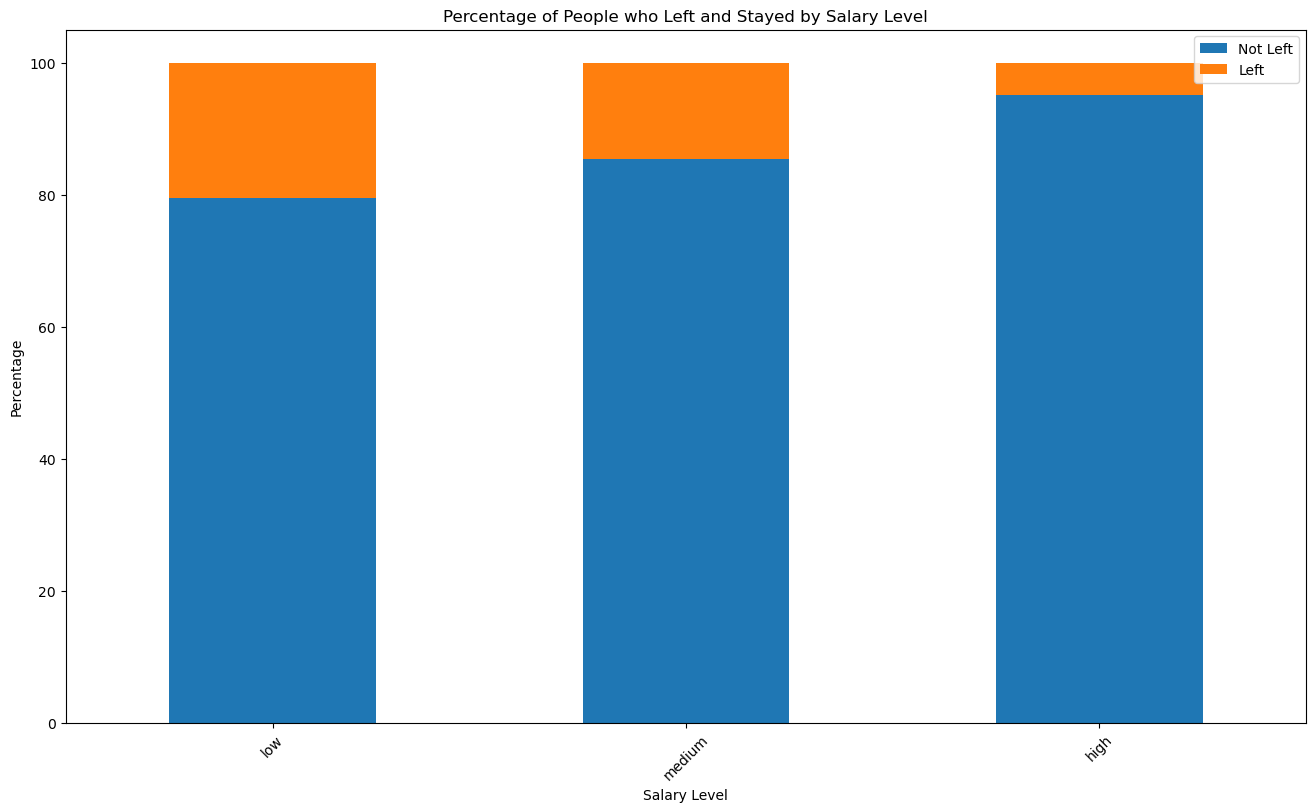

In [21]:
# Calculate the percentage of people who left and stayed for each salary level
left_ratio = df.groupby('salary')['left'].value_counts(normalize=True).unstack() * 100

# Define the desired order of salary levels
salary_order = ['low', 'medium', 'high']

# Reorder the columns based on the desired order
left_ratio = left_ratio.reindex(salary_order)

# Create a new figure with the desired size
plt.figure(figsize=(16, 9))

# Create a stacked bar plot
left_ratio.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Salary Level')
plt.ylabel('Percentage')
plt.title('Percentage of People who Left and Stayed by Salary Level')
plt.legend(['Not Left', 'Left'])
plt.xticks(rotation=45)

# Set the figure size
plt.gcf().set_size_inches(16, 9)

# Show the plot
plt.show()

The plot above clearly demonstrates a notable correlation between salary and the percentage of people who have left the company. As salary increases, there is a consistent linear relationship with a decreasing percentage of employees who have left. This suggests that higher salary levels may contribute to higher employee retention rates within the company. The level of influence of salary is unknown at this point and may even still not be a siginificantly important factor.

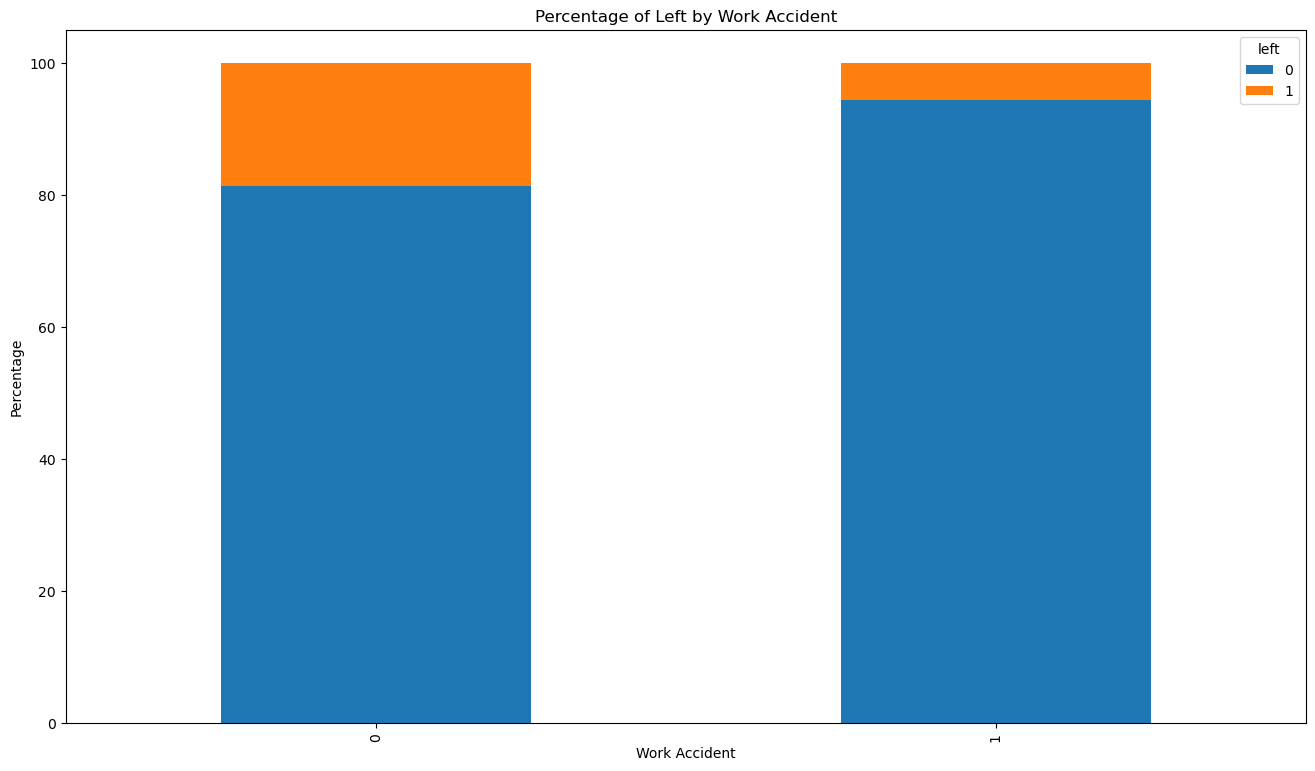

In [22]:
# Calculate the percentages of each combination of work_accident and Left
counts = df.groupby(['work_accident', 'left']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the bar chart
percentages.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('Work Accident')
plt.ylabel('Percentage')
plt.title('Percentage of Left by Work Accident')

plt.gcf().set_size_inches(16, 9)
# Show the plot
plt.show()

The plot above reveals an inverse relationship between work accidents and the number of people who have left the company. Specifically, fewer individuals who have experienced a work accident have left the company compared to those who have not had any accidents. This indicates that work accidents may be associated with a higher likelihood of employee retention.

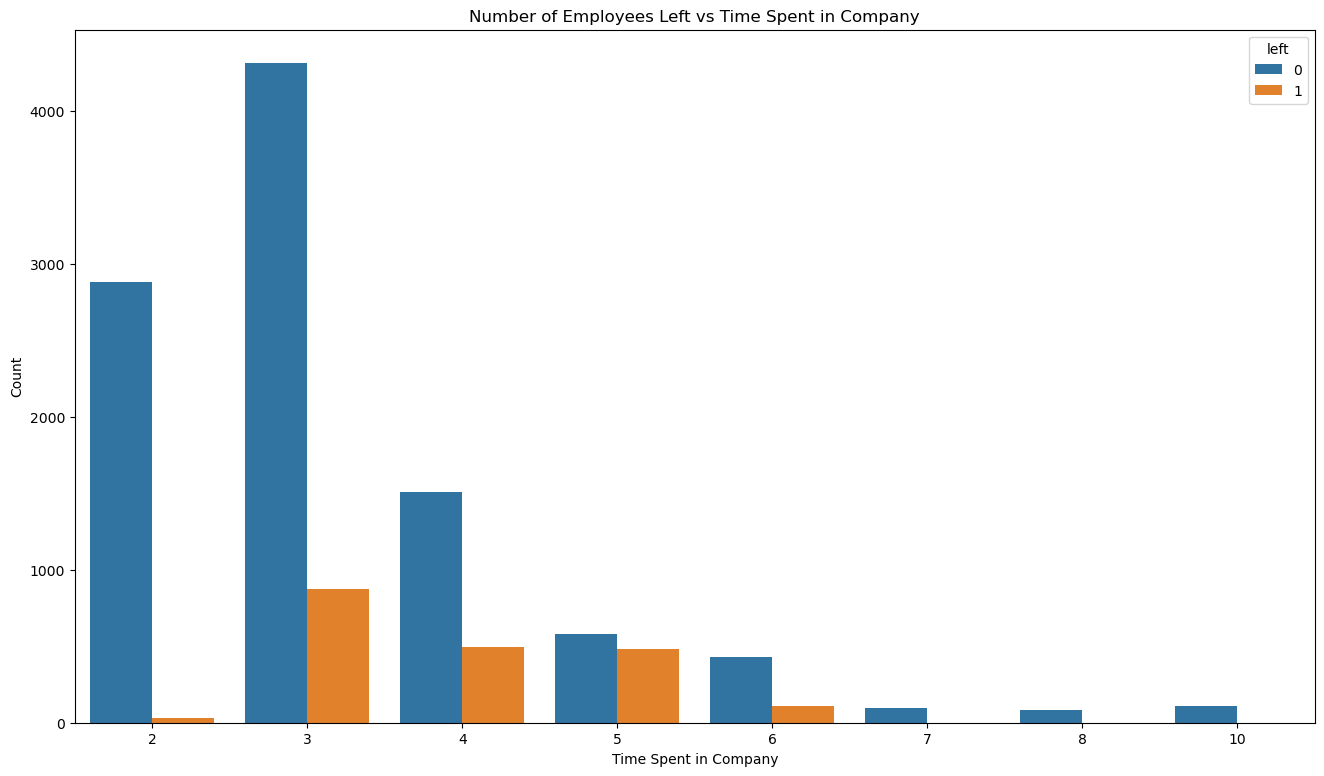

In [23]:
# Create countplot
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='time_spent_company', hue='left')

# Set plot labels and title
plt.xlabel('Time Spent in Company')
plt.ylabel('Count')
plt.title('Number of Employees Left vs Time Spent in Company')

# Show the plot
plt.show()

The analysis of employee tenure reveals a significant shift in the percentage of individuals who have left versus those who have stayed in the company. Notably, there is a sharp increase in the ratio of employees who left at the 4-year tenure mark, reaching its highest point at the 5-year mark. However, from the 6-year tenure onwards, the ratio begins to improve, indicating a lower likelihood of employees leaving. This pattern suggests the presence of a factor or factors that contribute to a higher attrition rate around the 4-year mark, with the ratio gradually improving thereafter.

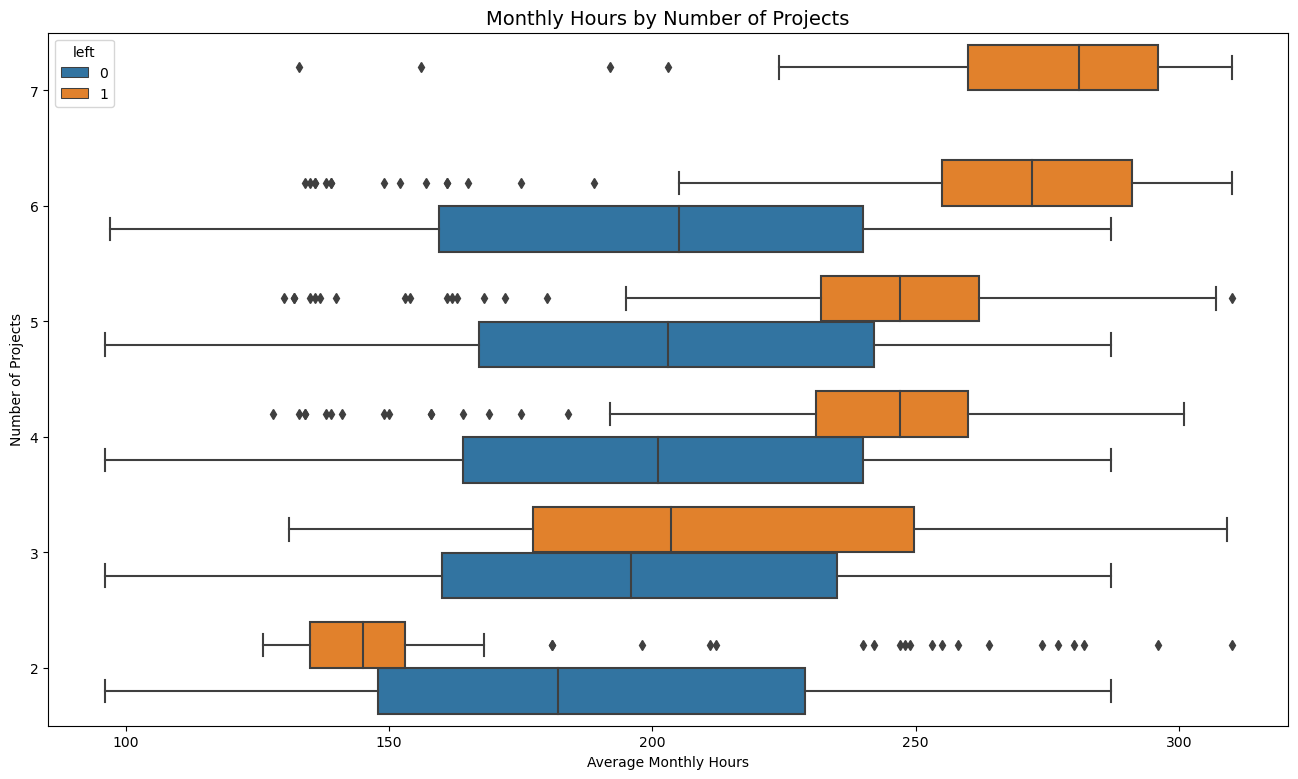

In [24]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Create boxplot
sns.boxplot(data=df, x='average_monthly_hours', y='number_of_projects', hue='left', orient='h', ax=ax)
ax.invert_yaxis()
ax.set_title('Monthly Hours by Number of Projects', fontsize=14)

# Set plot labels
ax.set_xlabel('Average Monthly Hours')
ax.set_ylabel('Number of Projects')

# Show the plot
plt.show()

It is reasonable to expect that individuals handling a greater number of projects would also be required to work longer hours. This relationship is apparent in the plot, where the mean hours spent on projects increase as the number of projects rises, for both employees who stayed and those who left the company. However, several notable observations can be made from this analysis.

- The employees who left the company can be divided into two distinct groups. Group A consists of individuals who worked significantly fewer hours compared to their counterparts with the same number of projects. It is plausible that this group includes individuals who were terminated from their positions. Additionally, it could include employees who had already submitted their resignation and were allocated reduced hours as they approached their departure. Group B comprises employees who worked significantly more hours. These individuals likely made substantial contributions to their projects and may have been key players in their respective teams.

- Interestingly, all employees who worked on seven projects left the company. Furthermore, the interquartile ranges for this group and those who left while working on six projects ranged from approximately 255 to 295 hours per week, surpassing other groups' ranges by a significant margin.

- The analysis indicates that the optimal number of projects for employees to handle falls within the range of 3 to 4. The ratio of employees who left versus those who stayed is notably lower for individuals assigned to this number of projects.

- Assuming a standard workweek of 40 hours and two weeks of annual vacation, the average monthly working hours for employees with a Monday-to-Friday schedule would be approximately 166.67 hours. Interestingly, every group, excluding those assigned to two projects, worked considerably more hours than this average, even among employees who remained with the company. This suggests that employees at this company are grappling with a high workload.

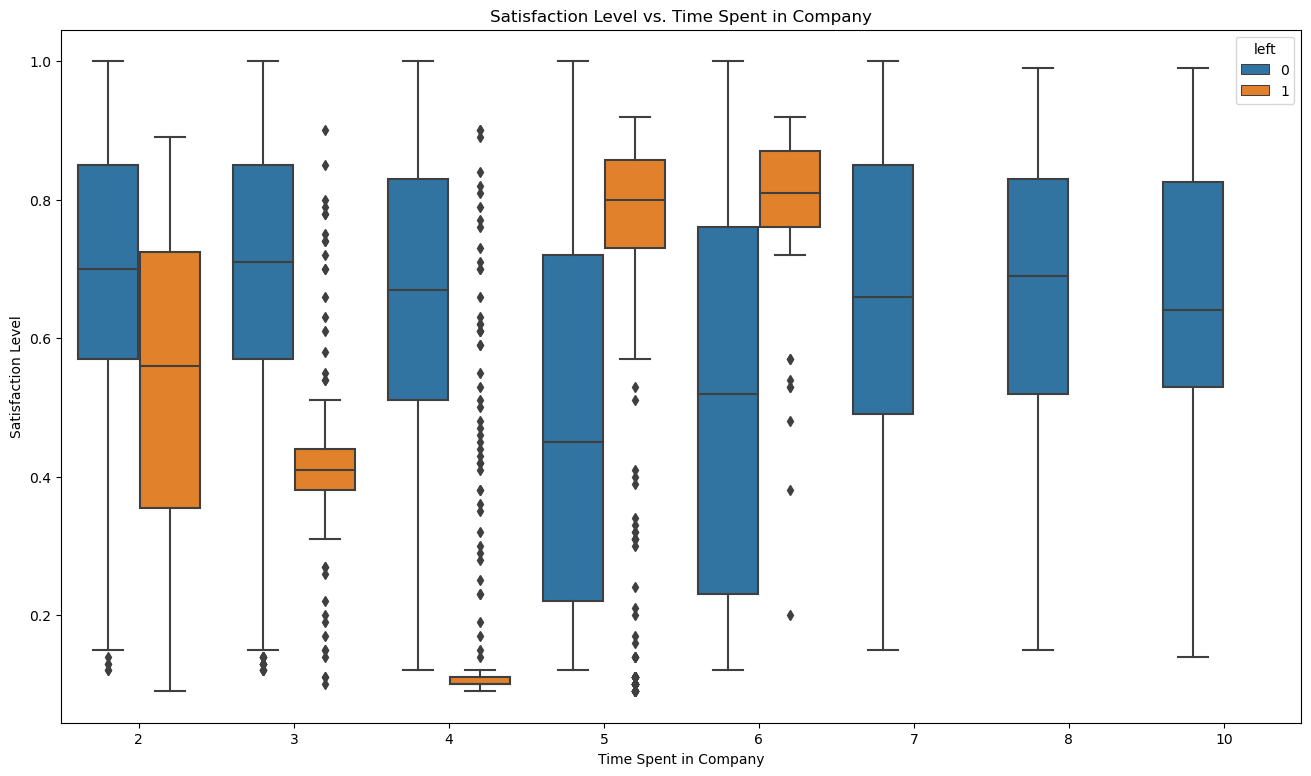

In [25]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=df, x='time_spent_company', y='satisfaction_level', hue='left')
plt.xlabel('Time Spent in Company')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs. Time Spent in Company')
plt.show()

The plot above suggests that certain individuals who have been with the company for a considerable period, specifically around 5-6 years, and have expressed high levels of satisfaction, still chose to leave. This could be attributed to personal factors such as a desire for new opportunities, career growth, or other motivations for seeking new beginnings. On the other hand, the majority of individuals who left the company had relatively shorter tenures, around 2 years, with moderate satisfaction levels. Notably, there is a small portion of individuals who left with the lowest satisfaction levels, primarily, and as noticed previously, again, around the 4-year mark.

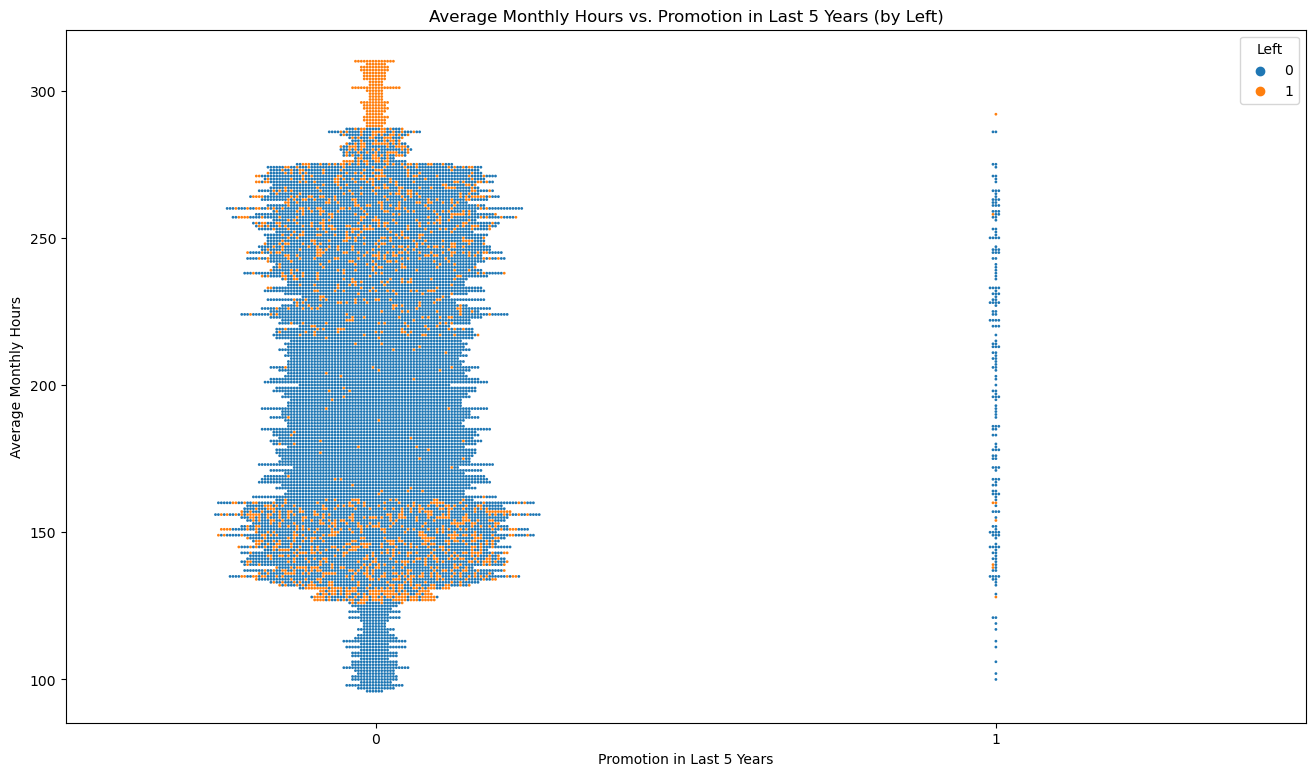

In [26]:
# Create a swarmplot 
plt.figure(figsize=(16, 9))
sns.swarmplot(data=df, x='promotion_last_5_years', y='average_monthly_hours', hue='left', size=2)

plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Promotion in Last 5 Years (by Left)')

plt.legend(title='Left', loc='upper right')
plt.show()

The plot above reveals several interesting patterns:

- A minimal number of employees who were promoted in the last five years decided to leave the company.
- There is a notable scarcity of promotions among employees who worked the highest number of hours.
- Interestingly, all employees who left the company were consistently among those who worked the longest hours.

It is clear that there is some correlation based on promotions.

### Insights
During the analyze stage, I observed several important relationships between variables. The feature importance analysis revealed that variables like the number of projects, last evaluation, average monthly hours, and time spent at the company have a significant impact on the likelihood of an employee leaving. These factors seem to be closely related to employee retention.

Based on my analysis, it appears that employees are leaving the company due to poor management practices. I found that longer working hours, handling multiple projects, and lower satisfaction levels are tied to employee departures. It can be demoralizing for employees to work long hours without receiving promotions or good evaluation scores. I also identified a significant group of employees who may be experiencing burnout. Interestingly, I noticed that employees who have been with the company for more than six years tend to have a lower tendency to leave.

# 3) Construct Stage

## Pre-considerations

### Identify the type of prediction task.
My objective is to predict whether an employee will leave the company, which requires classifying the outcome variable. In this case, it involves binary classification since the outcome variable "left" can take two values: 1, indicating that the employee left the company, and 0, indicating that the employee did not leave.

### Identify the types of models most appropriate for this task.
Given that the variable I aim to predict, whether an employee leaves the company, is categorical, I have two potential approaches. I could either construct a Logistic Regression model or utilize a Tree-based Machine Learning model. Therefore, I have the option to proceed with either of these approaches. Alternatively, I could implement both models and assess their respective performances to determine how they compare.

### Logistic Regression model assumptions
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## MODELLING APPROACH A: Logistic Regression Model
It's important to note that binomial logistic regression is well-suited for this task since it deals with binary classification. To begin, I will consider one-hot encoding the categorical variables, as necessary, to ensure they are appropriately represented in the model.

In [28]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['department', 'salary'])

# Drop the "salary_numeric" column from df_encoded
df_encoded = df_encoded.drop("salary_numeric", axis=1)

# Create new dataframe while keeping original encoded
df_outliers = df_encoded.copy()

# Display the encoded DataFrame
df_outliers.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  time_spent_company  work_accident  left  \
0                    157                   3              0     1   
1                    262                   6              0     1   
2                    272                   4              0     1   
3                    223                   5              0     1   
4                    159                   3              0     1   

   promotion_last_5_years  department_IT  department_RandD  ...  \
0                       0              0                 0  ...   
1                       0              0                 0  ...   
2                       0              0                 0  ...   
3                       0              0                 0  ...   
4                       0              0                 0  ...   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  

[5 rows x 21 columns]

Considering that logistic regression models can be sensitive to outliers, it is advisable to address this concern by removing the outliers identified in the "time_spent_company" column. This step will be beneficial for the subsequent analysis and modeling process. Consequently, I will examine and compare the results obtained from the logistic regression model with and without the presence of outliers.

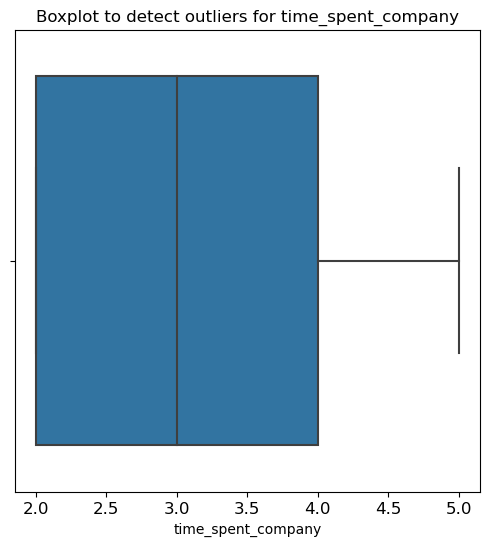

In [29]:
# Create a new DataFrame with outliers removed
df_no_outliers = df_outliers[(df_outliers["time_spent_company"] >= lower_bound) & (df_encoded["time_spent_company"] <= upper_bound)]

# Create a boxplot to visualize distribution of `time_spent_company` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for time_spent_company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_no_outliers['time_spent_company'])
plt.show()

In [30]:
# Split df_outliers
X_outliers = df_outliers.drop('left', axis=1)
y_outliers = df_outliers['left']
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

# Split df_no_outliers
X_no_outliers = df_no_outliers.drop('left', axis=1)
y_no_outliers = df_no_outliers['left']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize logistic regression models
logreg_outliers = LogisticRegression(random_state=42, max_iter=1000)
logreg_no_outliers = LogisticRegression(random_state=42, max_iter=1000)

# Fit the models using the training data
logreg_outliers.fit(X_train_outliers, y_train_outliers)
logreg_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the performance of each model using the testing data
score_outliers = logreg_outliers.score(X_test_outliers, y_test_outliers)
score_no_outliers = logreg_no_outliers.score(X_test_no_outliers, y_test_no_outliers)

print("Accuracy with outliers:", score_outliers)
print("Accuracy without outliers:", score_no_outliers)


Accuracy with outliers: 0.8332638599416423
Accuracy without outliers: 0.824977618621307


The accuracy is slightly higher with outliers included. Lets examine this further to see how the 2 models perform because accuracy is not the only metric to consider.

In [35]:
# Use the logistic regression model to get predictions on the test set
y_pred = logreg_outliers.predict(X_test_outliers)

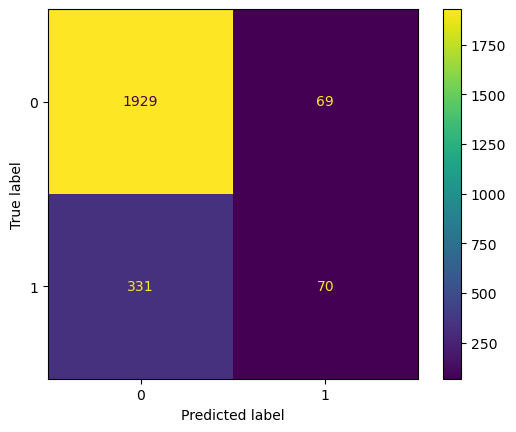

In [36]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_outliers, y_pred, labels=logreg_outliers.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=logreg_outliers.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [37]:
# Use the logistic regression model to get predictions on the test set
y_pred = logreg_no_outliers.predict(X_test_no_outliers)

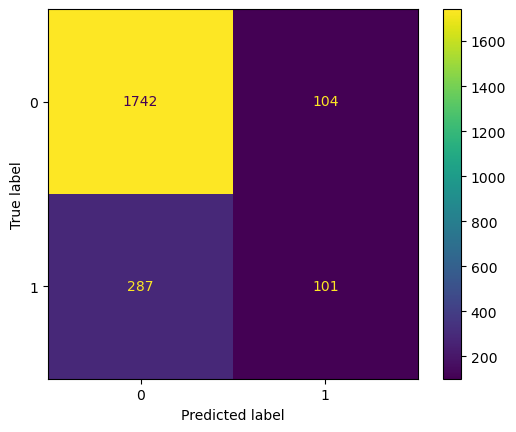

In [38]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_no_outliers, y_pred, labels=logreg_no_outliers.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=logreg_no_outliers.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

- The upper-left quadrant displays the number of true negatives - the number of people who did not leave that the model accurately predicted did not leave.
- The upper-right quadrant displays the number of false positives - the number of people who did not leave the model inaccurately predicted as leaving.
- The bottom-left quadrant displays the number of false negatives - the number of people who left that the model inaccurately predicted did not leave.
- The bottom-right quadrant displays the number of true positives - the number of people who left the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false
positives.

Interpreting the results, we have two logistic regression models: one with outliers and one without outliers. Let's analyze the performance of each model.

For the model with outliers:

* True negatives: 1929
* False positives: 69
* False negatives: 331
* True positives: 70

For the model without outliers:

* True negatives: 1742
* False positives: 104
* False negatives: 287
* True positives: 101

Based on the classification reports, we can further analyze the performance of each model. First, check the class balance.

In [39]:
class_balance = df_outliers['left'].value_counts(normalize=True)
print(class_balance)

0    0.833959
1    0.166041
Name: left, dtype: float64


In [40]:
class_balance = df_no_outliers['left'].value_counts(normalize=True)
print(class_balance)

0    0.831468
1    0.168532
Name: left, dtype: float64


There is a commonly suggested guideline indicating that a class imbalance exceeding a ratio of 1:10 (i.e., the minority class representing less than 10% of the data) is typically considered imbalanced. In the given scenario, there is an approximate 83%-17% split (with slight variance between the 2 models' exact figures, and Model 1 having a slightly better class balance), indicating that the data is not perfectly balanced. However, it can be observed that the degree of imbalance is not excessive and falls within an acceptable range.

In [35]:
# Make predictions on the test set using the logistic regression model trained on df_outliers
y_pred_outliers = logreg_outliers.predict(X_test_outliers)

# Create a classification report for df_outliers
target_names = ['Predicted would not leave', 'Predicted would leave']
report_outliers = classification_report(y_test_outliers, y_pred_outliers, target_names=target_names)
print(report_outliers)

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.97      0.91      1998
    Predicted would leave       0.50      0.17      0.26       401

                 accuracy                           0.83      2399
                macro avg       0.68      0.57      0.58      2399
             weighted avg       0.80      0.83      0.80      2399



In [36]:
# Make predictions on the test set using the logistic regression model trained on df_no_outliers
y_pred_no_outliers = logreg_no_outliers.predict(X_test_no_outliers)

# Create a classification report for df_no_outliers
target_names = ['Predicted would not leave', 'Predicted would leave']
report_no_outliers = classification_report(y_test_no_outliers, y_pred_no_outliers, target_names=target_names)
print(report_no_outliers)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.82      0.80      2234



The macro average F1-score is 0.58 for Model 1 and 0.62 for Model 2. The weighted average F1-score is 0.80 for both models. These scores indicate the average performance across both classes, considering their respective support.

The Accuracy for Model 1 is 0.83 compared to Model 2 at 0.82.

Considering the macro average and weighted average F1-scores, both models perform similarly. However, since the macro average treats each class equally, it may be more appropriate to consider the weighted average F1-score, especially in scenarios with class imbalance.

Therefore, based on the weighted average F1-score, there is no significant difference between Model 1 and Model 2. Both models have comparable overall performance. Both models have higher F1-scores for "Predicted would not leave" compared to "Predicted would leave." However, Model 2 has a slightly higher F1-score for "Predicted would leave" (0.34) compared to Model 1 (0.26).

Considering that the task at hand is predicting whether an employee will leave the company, it is important to have a balance between precision and recall for both positive and negative classes. The F1-score takes into account both precision and recall, making it a suitable metric for evaluating the overall performance of the models.

Therefore, based on the F1-scores, Model 2 performs slightly better in predicting the positive class ("Predicted would leave") compared to Model 1 even though Accuracy is slightly lower (0.01) for model 2, which is negligible. 

## MODELLING APPROACH B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

Tree-based models, such as decision trees and random forests, are generally less sensitive to outliers compared to linear models like linear regression or logistic regression. The main reason for this is that tree-based models partition the feature space into smaller regions, and outliers are more likely to fall into their own separate regions or affect only a few specific branches of the tree.

In a decision tree, the splitting process is based on finding the best split that maximizes the purity or information gain in each node. Outliers may have little impact on the splitting decisions if they are isolated or do not significantly affect the overall distribution of the data.

Random forests, which are ensembles of decision trees, further reduce the impact of outliers. Each decision tree in the random forest is trained on a random subset of features and data, which helps to reduce the influence of outliers on individual trees. The final prediction is then based on the aggregated predictions of all the trees, providing a more robust estimate.

However, it's important to note that extremely influential outliers can still affect tree-based models, especially if they are present in the training data. In some cases, outliers can lead to overfitting or biased predictions if they are not properly handled.

To mitigate the potential impact of outliers, it's recommended to preprocess the data by removing or treating outliers before training tree-based models. Additionally, techniques like robust scaling or Winsorization can be used to rescale or transform the data in a way that reduces the influence of outliers.

Overall, while tree-based models are generally less sensitive to outliers compared to linear models, it's still important to be aware of their presence and take appropriate preprocessing steps to ensure reliable model performance.

### Decision Tree - Round 1
Categorical variables need to be one-hot encoded for tree-based models as well just like for logistic regression. For the reasons explained above, outliers will not be removed. The previous dataframe df_outliers was derived from the df_encoded (one-hot encoded) dataframe. Therefore, the df_outliers can be copied and used for the following models.
I will construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters. 

In [42]:
df_tree = df_outliers.copy()

In [43]:
# Isolate the outcome variable
y = df_tree['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [44]:
# Select X features
X=df_tree.drop('left', axis=1)
X.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  time_spent_company  work_accident  \
0                    157                   3              0   
1                    262                   6              0   
2                    272                   4              0   
3                    223                   5              0   
4                    159                   3              0   

   promotion_last_5_years  department_IT  department_RandD  \
0                       0              0                 0   
1                       0              0                 0   
2                       0              0                 0   
3                       0              0                 0   
4                       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_high  salary_low  \
0                   0                     0            0           1   
1                   0                     0            0           0   
2                   0                     0            0           0   
3                   0                     0            0           1   
4                   0                     0            0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [45]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#Split the training data into training subset and validation subset
X_trainsub, X_val, y_trainsub, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [46]:
# Create a Decision Tree classifier object
decision_tree = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Define the scoring metrics
scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc'
}

# Create a GridSearchCV object with cross-validation
dt_model = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='roc_auc'
)


In [49]:
# Fit the decision tree model to the subset training data
dt_model.fit(X_trainsub, y_trainsub)

# Print the best parameters
print("Best Parameters:", dt_model.best_params_)

# Check best AUC score on CV
print('Best AUC Score:',dt_model.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best AUC Score: 0.972937327480013


This is a strong AUC score, which shows that this model can predict employees who will leave very well.
Next, I will write a function that will help extract all the scores from the grid search.

In [50]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [51]:
# Get all CV scores
dt_model_cv_results = make_results('decision tree cv', dt_model, 'auc')
dt_model_cv_results

C:\Users\ruipa\AppData\Local\Temp\ipykernel_10216\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.972937   0.946031  0.923013  0.934344  0.978454

These metrics provide an assessment of the performance of the decision tree model. A high AUC score indicates good predictive ability, while high precision and recall values suggest that the model is able to correctly identify both positive and negative instances.

The "decision tree cv" model appears to have performed well based on the given metrics, indicating its effectiveness in predicting the target variable. All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. I will construct a random forest model next.

### Random Forest - Round 1
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [52]:
# Create the random forest classifier
random_forest = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500],
}

# Assign the scoring metrics
scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc',
}

# Set up cross-validated grid search
rf_model = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)


In [53]:
# Fit the grid search to the subset training data
rf_model.fit(X_trainsub, y_trainsub)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'recall', 'accuracy', 'roc_auc'})

In [54]:
# Print the best parameters and best score
print("Best Parameters:", rf_model.best_params_)
print("Best AUC Score:", rf_model.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
Best AUC Score: 0.9788403597605164


Identify the best AUC score achieved by the random forest model on the training set.

In [55]:
# Get all CV scores
rf_model_cv_results = make_results('random forest cv', rf_model, 'auc')
print(dt_model_cv_results)
print(rf_model_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.972937   0.946031  0.923013  0.934344  0.978454
              Model      AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.97884   0.952147  0.913808  0.932506  0.978037


C:\Users\ruipa\AppData\Local\Temp\ipykernel_10216\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall, F1 and Accuracy. This indicates that the decision tree model slightly outperforms the random forest model.

Next, I will evaluate these models on the validation set.

Define a function that gets all the scores from a model's predictions.

In [56]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

Apply the function defined above to get scores for the decision tree model and the random forest model. 

In [57]:
# Get the results on validation set for both models
dt_model_val_results = get_scores('decision tree val', dt_model, X_val, y_val)
rf_model_val_results = get_scores('random forest val', rf_model, X_val, y_val)

# Concatenate validation scores into table
all_val_results = [dt_model_val_results, rf_model_val_results]
all_val_results = pd.concat(all_val_results).sort_values(by='AUC', ascending=False)
all_val_results

model    AUC  precision  recall     f1  accuracy
0  decision tree val  0.955      0.946   0.920  0.932     0.978
0  random forest val  0.952      0.955   0.912  0.933     0.978

On the validation set, the decision tree model slightly outperforms the random forest model across few metrics.

Now use the best performing model to predict on the test set.

In [58]:
# Get predictions on test data
dt_model_test_scores = get_scores('decision tree test', dt_model, X_test, y_test)
dt_model_test_scores

model    AUC  precision  recall     f1  accuracy
0  decision tree test  0.955      0.953    0.92  0.936     0.979

Comparing the model's performance on the validation data and the test data, we can observe the following:

AUC: The model's AUC on the test data (0.955) is equal to the validation data, indicating that the model generalizes very well to unseen data. 

Precision: The precision on both the validation data (0.946) and the test data (0.953) are very close, indicating that the model is consistent in its ability to correctly identify positive samples. 

Recall: The recall on the test data (0.92) is equal to the validation data.  

F1 Score: The F1 score on the test data (0.936) is slightly higher than the F1 score on the validation data (0.932). 

Accuracy: The accuracy on the test data (0.979) is higher than the accuracy on the validation data (0.978), indicating that the model performs slightly better overall on the test data. 

Overall, the model shows good generalization to unseen data, as it performs slightly better on the test data compared to the validation data across most evaluation metrics.

### Feature Engineering
The first round of the ML models included all variables. With this 2nd round, some variables will be removed in order to incorporate feature engineering and thereby aim to improve the models. The 2 variables that will be dropped is 'satisfaction_level' and 'work_accident'. Satisfaction level might be a source of data leakage due to the unknown nature of this variable i.e., all employees might not have reported satisfaction levels as well as the possibility that some may have reported low satisfaction levels after quitting or being fired as discussed previously after plotting the scatterplot of satisfaction_level vs average_monthly_hours in Section 2. The work_accident variable was also discussed and shown to have no correlation or effect on people leaving in Section 2.  

In [59]:
# Drop `satisfaction_level and work_accident` and save resulting dataframe in new variable
df_tree2 = df_outliers.drop(['satisfaction_level', 'work_accident'], axis=1)

# Display first few rows of new dataframe
df_tree2.head()

last_evaluation  number_of_projects  average_monthly_hours  \
0             0.53                   2                    157   
1             0.86                   5                    262   
2             0.88                   7                    272   
3             0.87                   5                    223   
4             0.52                   2                    159   

   time_spent_company  left  promotion_last_5_years  department_IT  \
0                   3     1                       0              0   
1                   6     1                       0              0   
2                   4     1                       0              0   
3                   5     1                       0              0   
4                   3     1                       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [60]:
# Isolate the outcome variable
y2 = df_tree2['left']

# Display the first few rows of `y`
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [61]:
# Select the features
X2 = df_tree2.drop('left', axis=1)

# Display the first few rows of `X`
X2.head()

last_evaluation  number_of_projects  average_monthly_hours  \
0             0.53                   2                    157   
1             0.86                   5                    262   
2             0.88                   7                    272   
3             0.87                   5                    223   
4             0.52                   2                    159   

   time_spent_company  promotion_last_5_years  department_IT  \
0                   3                       0              0   
1                   6                       0              0   
2                   4                       0              0   
3                   5                       0              0   
4                   3                       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

Split the data into training, validating, and testing sets. 

In [62]:
# Create test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_trainsub2, X_val2, y_trainsub2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.25, stratify=y_train2, random_state=0)

### Decision Tree - Round 2

In [63]:
# Create a Decision Tree classifier object
decision_tree2 = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Define the scoring metrics
scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc'
}

# Create a GridSearchCV object with cross-validation
dt_model2 = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='roc_auc'
)


In [64]:
# Fit the decision tree model to the subset training data
dt_model2.fit(X_trainsub2, y_trainsub2)

# Print the best parameters
print("Best Parameters:", dt_model2.best_params_)

# Check best AUC score on CV
print('Best AUC Score:',dt_model2.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best AUC Score: 0.9654686081962771


This model performs very well, even without satisfaction levels and detailed hours worked data.
Next, check the other scores.

In [65]:
# Get all CV scores
dt_model2_cv_results = make_results('decision tree cv', dt_model2, 'auc')
dt_model2_cv_results

C:\Users\ruipa\AppData\Local\Temp\ipykernel_10216\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.965469   0.902336  0.895397  0.898506    0.9665

Some of the other scores fell. That’s to be expected given fewer features were taken into account
in this round of the model. Still, the scores are very good.

In [66]:
# Get predictions on test data
dt_model2_test_scores = get_scores('decision tree test2', dt_model2, X_test2, y_test2)
dt_model2_test_scores

model    AUC  precision  recall     f1  accuracy
0  decision tree test2  0.942      0.893   0.905  0.899     0.966

### Random Forest - Round 2

In [87]:
# Create the random forest classifier
random_forest2 = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500],
}

# Assign the scoring metrics
scoring = {
    'accuracy',
    'precision',
    'recall',
    'f1',
    'roc_auc',
}

# Set up cross-validated grid search
rf_model2 = GridSearchCV(
    estimator=random_forest2,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)

In [71]:
# Fit the grid search to the subset training data
rf_model2.fit(X_trainsub2, y_trainsub2)

NameError: name 'rf_model2' is not defined

In [102]:
# Print the best parameters and best score
print("Best Parameters:", rf_model2.best_params_)
print("Best AUC Score:", rf_model2.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
Best AUC Score: 0.9746365235790403


In [103]:
# Get all CV scores
rf_model2_cv_results = make_results('random forest2 cv', rf_model2, 'auc')
print(dt_model2_cv_results)
print(rf_model2_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.965469   0.902336  0.895397  0.898506    0.9665
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.974637   0.942327  0.901255  0.921303  0.974423


C:\Users\ruipa\AppData\Local\Temp\ipykernel_20788\3715677182.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


The scores dropped slightly again, but the random forest performs better than the decision tree.
Next, test the models on the validation set.

In [104]:
# Collect validation scores
dt_model2_val_results = get_scores('decision tree2 val', dt_model2, X_val2, y_val2)
rf_model2_val_results = get_scores('random forest2 val', rf_model2, X_val2, y_val2)

# Concatenate validation scores into table
all_val_results2 = [dt_model2_val_results, rf_model2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

model    AUC  precision  recall     f1  accuracy
0  random forest2 val  0.952      0.941   0.915  0.927     0.976
0  decision tree2 val  0.947      0.901   0.915  0.908     0.969

It appears that the random forest performs slightly better than the decision tree, across most of
the evaluation metrics.
Next, use this random forest model to predict on the test set.

In [106]:
# Get predictions on test data
rf_model2_test_scores = get_scores('random forest2 test', rf_model2, X_test2, y_test2)
rf_model2_test_scores

model    AUC  precision  recall     f1  accuracy
0  random forest2 test  0.947       0.94   0.905  0.922     0.975

This seems to be a stable, well-performing final model.
Next, I will plot a confusion matrix to visualize how well it predicts on the test set.

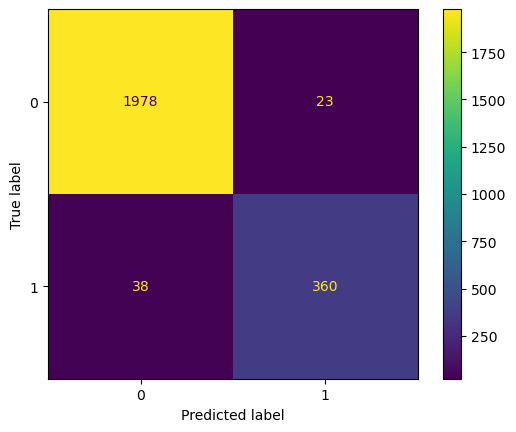

In [111]:
# Generate array of values for confusion matrix
preds = rf_model2.best_estimator_.predict(X_test2)
cm = confusion_matrix(y_test2, preds, labels=rf_model2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model2.classes_)
disp.plot()
plt.show()

The model tends to generate more false positives than false negatives, implying that there is a higher probability of identifying employees as being at risk of leaving or being fired when they are actually not. However, despite this limitation, the model still demonstrates robust performance and performs better than the decision tree model and by far better than the logistic regression model.  

### Decision tree feature importance 
Lets explore the decision tree feature importance.

In [112]:
#dt_model2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,columns=X.columns)
dt_model2_importances = pd.DataFrame(dt_model2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
dt_model2_importances = dt_model2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dt_model2_importances = dt_model2_importances[dt_model2_importances['gini_importance'] != 0]
dt_model2_importances

gini_importance
number_of_projects            0.337254
last_evaluation               0.287359
average_monthly_hours         0.265834
time_spent_company            0.108180
salary_low                    0.000831
department_support            0.000542

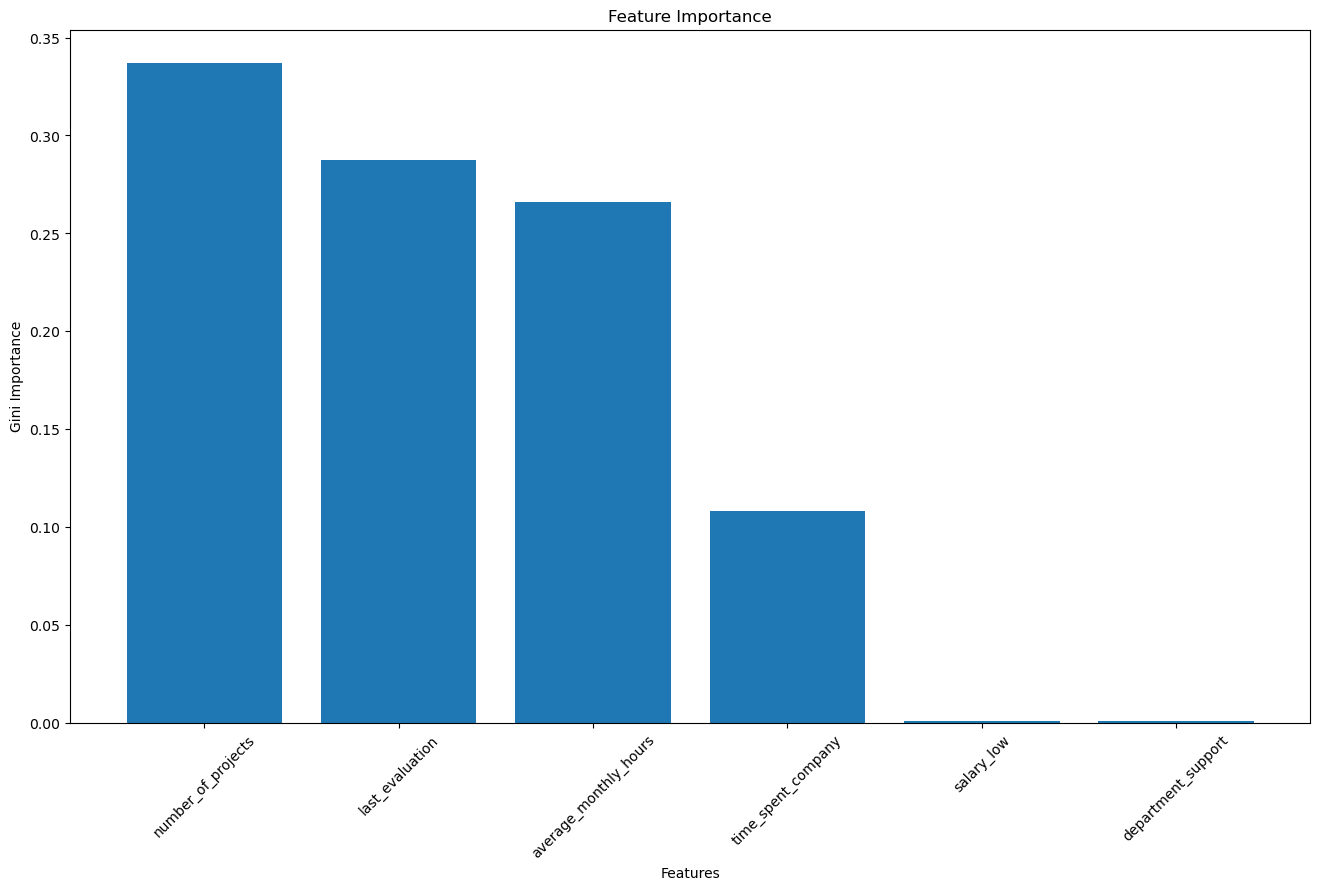

In [114]:
# Plot the results as a bar graph
plt.figure(figsize=(16, 9))  # Set the size of the figure
plt.bar(dt_model2_importances.index, dt_model2_importances['gini_importance'])
plt.xlabel('Features')
plt.ylabel('Gini Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

The barplot above shows that in this decision tree model, number_project, last_evaluation, average_monthly_hours, and time_spent_company have the highest importance, in that order. These variables are most
helpful in predicting the outcome variable, "left" for the decision tree model.

### Random forest feature importance 
Lets explore the random forest feature importance.

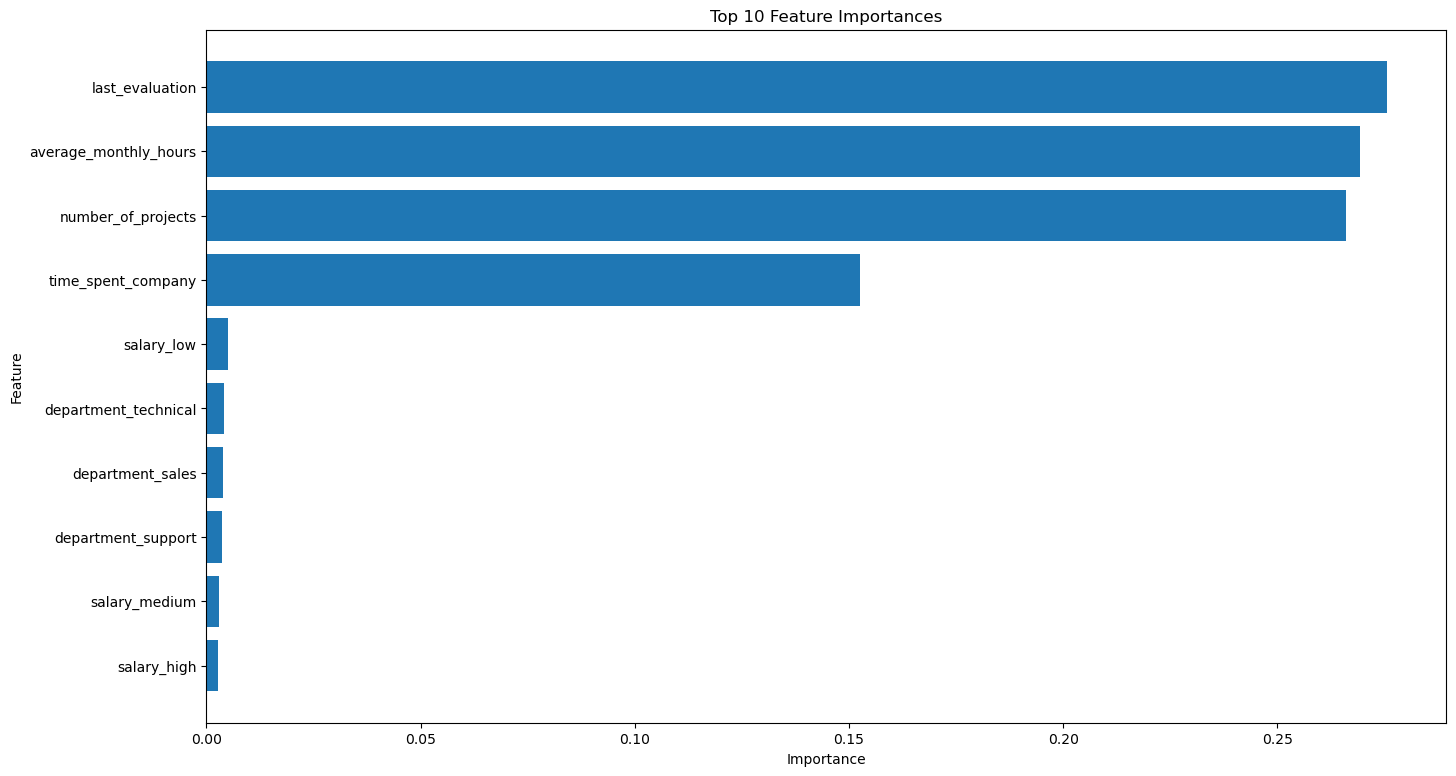

In [117]:
# Get feature importances
feature_importances = rf_model2.best_estimator_.feature_importances_

# Get indices of top 10 features
top_feature_indices = np.argsort(feature_importances)[-10:]

# Get top features and their importances
top_features = X.columns[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

# Create a sorted DataFrame
sorted_feature_df = pd.DataFrame({"Feature": top_features, "Importance": top_feature_importances}).sort_values("Importance")

# Plot the sorted feature importances
fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(sorted_feature_df["Feature"], sorted_feature_df["Importance"])
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title("Top 10 Feature Importances")
plt.show()

The plot above shows that in this random forest model, last_evaluation, average_monthly_hours, number_of_projects, and time_spent_company have the highest importance, in that order.
These variables are most helpful in predicting the outcome variable, "left" for the random forest model which is the best performing model.

# 4) Execution Stage

### Summary of model results

#### Logistic Regression
The logistic regression model 2 (Without Outliers) achieved precision of 80%, recall of 82%, f1-score of 80% (all weighted
averages), and accuracy of 82%, on the test set.
#### Tree-based Machine Learning
After conducting feature engineering, the decision tree model achieved AUC of 94.2%, precision
of 89.3%, recall of 90.5%, f1-score of 89.9%, and accuracy of 96.6%, on the test set. The random
forest model lightly outperformed the decision tree model with AUC of 94.7%, precision
of 94.0%, recall of 90.5%, f1-score of 92.2%, and accuracy of 97.5.6%.

### Key insights from the models:
- The number of projects, last evaluation, average monthly hours, time spent in the company, and salary (to a low extent) are important factors in predicting employee attrition.
- Employees with a higher number of projects, lower evaluation scores, longer working hours, longer tenure, and lower salaries are more likely to leave the company.

Based on the results obtained from the feature importance analysis for the best performing model (Random Forest), I can provide the following argument to relevant stakeholders regarding the likelihood of an employee leaving the company:

1. Last Evaluation: The evaluation score of an employee is the first and most important factor in predicting whether they will leave. Employees who receive lower evaluation scores may perceive it as a lack of recognition or advancement opportunities, which can contribute to their decision to leave.

2. Average Monthly Hours: The number of hours an employee spends on average per month is the second most important factor in determining the likelihood of leaving. Employees who work long hours consistently may experience burnout and dissatisfaction, leading them to consider leaving the company.

3. Number of Projects: The number of projects assigned to an employee also plays a significant role in their likelihood of leaving. Employees with a higher number of projects may feel overwhelmed or overworked, leading to decreased job satisfaction and a higher chance of leaving.

4. Time Spent in the Company: The duration of an employee's tenure with the company is an important factor in understanding employee attrition. The analysis reveals a significant shift in the ratio of individuals who have left versus those who have stayed. Notably, there is a higher likelihood of employees leaving around the 4-year mark, reaching its peak at the 5-year mark. However, from the 6-year tenure onwards, the attrition rate improves, indicating a lower likelihood of employees leaving. This pattern suggests the presence of factors contributing to higher attrition rates around the 4-year mark, with the ratio gradually improving thereafter.

5. Salary: Although not as influential as the previous factors, employees with a lower salary have a slightly higher chance of leaving. This suggests that compensation plays a role in employee retention, and competitive salaries may contribute to higher employee satisfaction and lower turnover.

Overall, the findings indicate that factors related to workload, recognition, career growth, and compensation are critical in predicting employee attrition. To retain employees and reduce turnover, it is essential for the company to address these factors by ensuring manageable workloads, providing regular feedback and opportunities for growth, and offering competitive compensation packages. 

### Recommendations

**Business recommendations based on the models:**

- Manage workload: Monitor the number of projects assigned to employees and ensure they are within manageable limits to prevent burnout and dissatisfaction.
- Recognition and career growth: Implement a robust performance evaluation system to provide regular feedback and recognition to employees. Offer opportunities for skill development and advancement within the company.
- Work-life balance: Encourage a healthy work-life balance by promoting reasonable working hours and offering flexible work arrangements if feasible.
- Competitive compensation: Regularly review and benchmark salaries to ensure they are competitive in the industry. Consider offering additional incentives and benefits to attract and retain top talent.
- Retention programs: Develop retention programs and initiatives tailored to the specific needs and challenges of different departments, including the Support department.

By implementing these recommendations, the company can strive to create a healthier and more balanced work environment, leading to improved employee retention and satisfaction. It is crucial to address the issue of overwork and ensure fairness and transparency in evaluating employee performance and promoting employee well-being.

**Potential recommendations to the manager/company:**

- Conduct employee satisfaction surveys: Gather feedback from employees to identify specific pain points and areas of improvement within the organization.
- Exit interviews: Conduct thorough exit interviews with departing employees to understand their reasons for leaving and identify patterns or common concerns.
- Improve communication and transparency: Foster a culture of open communication, transparency, and regular feedback to address any employee concerns proactively.

**Model improvement:**

- Feature engineering: Explore additional feature engineering techniques, such as creating new variables or combining existing ones, to capture complex relationships and improve model performance.
- Model ensemble: Consider using ensemble techniques, such as combining multiple models or using boosting algorithms, to further improve prediction accuracy.
- Data collection: Gather additional relevant data, such as employee satisfaction surveys, performance metrics, or employee feedback, to enhance the model's predictive power.

**Other questions to address for the team:**

- Employee engagement: Identify factors that contribute to higher employee engagement and satisfaction to improve productivity and retention rates.
- Performance prediction: Build models to predict employee performance or identify high-potential employees for targeted development programs.
- Employee churn analysis: Analyze patterns and reasons for employee churn to proactively identify and retain at-risk employees.
- Diversity and inclusion: Investigate the impact of diversity and inclusion initiatives on employee satisfaction and retention.

*Resources used during this stage:*
- Python documentation: https://docs.python.org/ (for Python programming reference)
- pandas documentation: https://pandas.pydata.org/docs/ (for pandas library usage and functions)
- scikit-learn documentation: https://scikit-learn.org/stable/ (for machine learning algorithms and tools)
- matplotlib documentation: https://matplotlib.org/stable/contents.html (for data visualization using matplotlib)

*Ethical considerations:*
1. Privacy and data protection: Ensure compliance with privacy regulations and handle employee data responsibly to protect individuals' privacy rights.
2. Fairness and bias: Regularly assess and mitigate any potential biases in the models and data to ensure fair treatment of employees from diverse backgrounds.
3. Transparency and accountability: Clearly communicate to employees the purpose and use of the models, and establish mechanisms for addressing any concerns or biases in the modeling process.